## <font color='blue'> Construction of Hexa-Net Brain Atlas (6 RSNs)</font>
==============================================================

#### This Code is Written by:    Phd Student  <font color=Blue> Dalia A. A. Al-Ubaidi </font> <br> <div class="alert alert-info">University Technology Malaysia, UTM</div> <br> Email: aadalia-1980@graduate.utm.my
***

In [2]:
######################## Power Atlas Details---and display Each NoI seperately ##############################
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
# ==============================================================
def remove_items(test_list, item):
 
    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]
 
    return res
# =============================================================
def FilterRegion(Arr,List):
    NewA = np.zeros_like(Arr)
    for i in range(len(Arr)):
        if(Arr[i] in List):
            NewA[i]=Arr[i]
        else:
                NewA[i]=0       
            
    return  NewA 
# ==================================================================
def Clear_n_Keep(Arr,RemoveList, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] in RemoveList:
            new_array[i]=KeepValue

    return new_array
# ===================================================
def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
#             print(Arr1[i], Arr2[i])
            print('Error in Combination')
           
    return (new_array)


In [3]:
def Create_NetwِAtlasImg(atlasFile, DictionaryLabel, ExcludedLabList):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    ListL=[]
    for Key,Value in DictionaryLabel.items():
#         print(i,'-',Key,'--',Value)
        narr=Clear_n_Keep(atlas_flat,Value,Key)
        ListL.append(narr)
        
    WholeArr=Clear_n_Keep(atlas_flat,[],0)

    for i in range(0,len(ListL)):
        Arr=np.array(ListL[i])
        WholeArr=CombineArr(WholeArr,Arr)
        
    atlas_flat=np.array(WholeArr)
    
    for x in ExcludedLabList:
        atlas_flat[atlas_flat == x] = 0
#     for Key,Value in DictionaryLabel.items():
#         if Key in ExcludedLabList:
#             for v in Value:
#                 atlas_flat[atlas_flat == v] = 0
#         else:
#             for v in Value:
#                 atlas_flat[atlas_flat == v] = Key
            
    atlas_flat[atlas_flat == 2] = 1  # for power atlas only change all 2 into 1
    
    atlas_flat[atlas_flat == 11] = 2  # for power atlas only change all 11 into 2
    
    atlas_flat[atlas_flat == 12] = 6  # for power atlas only change all 2 into 1
    
    newAtlas=atlas_flat.reshape(atlas_data.shape)
    this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
    return this_img

Six_RSNs_Labels=['1_AUN','2_CCN','3_DAN','4_DMN','5_SMN','6_VAN']


In [4]:
def DrawRoIs(atlasFile,NLabelList):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    Filtered_Network=FilterRegion(atlas_flat,NLabelList)
    
    Filtered_data = Filtered_Network.reshape(atlas_data.shape)
#     atlas_data = atlas_data.astype(int)
#     this_data = (atlas_data == NLabelList)
    
#     this_img = new_img_like(atlas_img, Filtered_data, affine)
    this_img =nib.Nifti1Image(Filtered_data,  atlas_img.affine, header=atlas_img.header)
    plotting.plot_roi(this_img, cmap='winter', title='Yeo Atlas Region '+str(NLabelList)) # cut_coords=coords,cut_coords=(2,-75,3),
    return this_img
#=========================================================================================================
def DrawNoIs(atlasFile,LabNo,NLabel,RegionDic):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    Filtered_Network=FilterRegion(atlas_flat,NLabel)
    
    Filtered_data = Filtered_Network.reshape(atlas_data.shape)
#     atlas_data = atlas_data.astype(int)
#     this_data = (atlas_data == NLabel)
    
#     this_img = new_img_like(atlas_img, Filtered_data, affine)
    this_img =nib.Nifti1Image(Filtered_data,  atlas_img.affine, header=atlas_img.header)
    plotting.plot_roi(this_img, cmap='brg', title='Power Atlas Network '+str(LabNo)+' '+ RegionDic[0]) # cut_coords=coords,cut_coords=(2,-75,3),
    return this_img


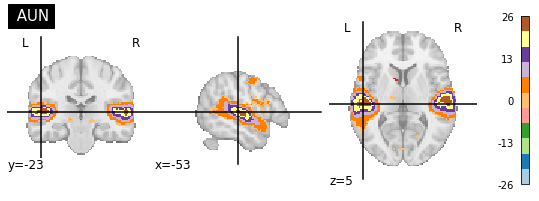

auditory_association-test_z_FDR_0.01.nii.gz
no_of_labels = 2
uniqe labels = [0 1]
No. of Non-Zero Voxels = 11779
Size of brain Atlas (No. of Voxels) = 902629


In [19]:
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='Paired', #tab10
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    atlas_flat[atlas_flat > 0]= 1
    atlas_flat[atlas_flat < 0]= 0
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
# F='ATLASES/FlexibilityAtlas.nii.gz'
# F='CAREN-1/CAREN_Confidence_Percentage.nii'
# F='CAREN-1/CAREN_5RSNS.nii'
# F='Org_Atlases/Yeo2011_7Networks_thick_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
# F='Org_Atlases/Schaefer2018_100Parcels_17Networks_order_FSLMNI152_1mm.nii.gz'
# F='HexaNet_ATLAS.nii.gz'
F='auditory_association-test_z_FDR_0.01.nii.gz' #'AUN-anatomical.nii.gz'
plotting_image(F," AUN")
Display_Img_Labels(F)

In [1]:
# power_info="Power Atlas Info.csv"
# df = pd.read_csv(power_info)

# # Creating an empty dictionary
# myLabelsDict = {}
# myRegionsDict = {}
# for R, L, RN in zip(df['ROI'],df['Label'],df['RegionName']):
#     myLabelsDict.setdefault(L, []).append(R)
#     myRegionsDict.setdefault(L, []).append(RN)

    
# print('------- dictionary-----------')   
# for K,V in myRegionsDict.items():
#     print(K,'-',V,'\n')
    
# img= Create_NetwِAtlasImg('data4test/power264MNI.nii.gz', myLabelsDict, [6,13])
# img.to_filename("data4test/PowerAtlas_10Networks.nii.gz")

# Display_Img_Labels("data4test/PowerAtlas_10Networks.nii.gz")
# plotting_image("data4test/PowerAtlas_10Networks.nii.gz","New Power Atlas")



# power_labels=['1_Sensory/somatomotor','2_Ventral attention','3_Cingulo-opercular Task Control','4_Auditory',
#               '5_Default mode','6_Dorsal attention','7_Visual','8_Fronto-parietal Task Control',
#               '9_Salience','10_Subcortical']
# Display_Img_Labels("ATLASES/PowerAtlas_10Networks.nii.gz") #, power_labels)
# plotting_image("ATLASES/PowerAtlas_10Networks.nii.gz","New Power Atlas")

Original Labels
ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz
no_of_labels= 10
uniqe labels = [ 1  2  3  4  5  6  7  8  9 10]
 no of 7 in array= 0
ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz
no_of_labels= 6
uniqe labels = [1 2 3 4 5 6]


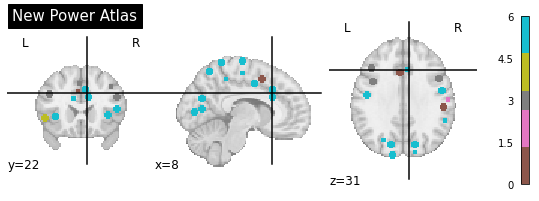

ATLASES/ReLabeled_Atlases/PowerAtlas_1stRSN.nii.gz
no_of_labels= 1
uniqe labels = [1]


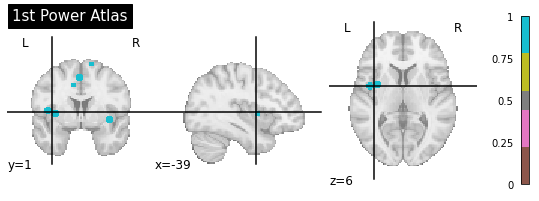

ATLASES/ReLabeled_Atlases/PowerAtlas_2ndRSN.nii.gz
no_of_labels= 1
uniqe labels = [2]


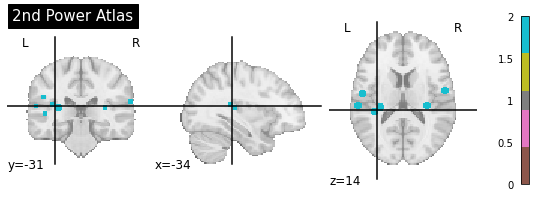

In [15]:
# ===================== Convert Power Atlas into 6 RSNs ==============================

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array

Six_RSNs_Labels=['1_AUN','2_CCN','3_DAN','4_DMN','5_SMN','6_VAN']

atlasFile='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)

atlas_img=nib.load(atlasFile)
atlas_data = atlas_img.get_fdata() 
    
atlas_flat = atlas_data.flatten()
atlas_flat=atlas_flat.astype(int)
    
# remove labels 7 and 10
atlas_flat[atlas_flat == 7] = 0
atlas_flat[atlas_flat == 10] = 0

count = atlas_flat.tolist().count(7)
print(' no of 7 in array=',count)


# Keep other labels

narr1=Clear_n_KeepOne(atlas_flat,1)
narr1=np.array(narr1)
narr1[narr1 == 1] = 5

# print(' no of 1 in array=',narr1.tolist().count(1))
# count = narr1.tolist().count(5)
# print(' no of 5 in array=',count)

narr2=Clear_n_KeepOne(atlas_flat,2)
narr2=np.array(narr2)
narr2[narr2 == 2] = 6

narr3=Clear_n_KeepOne(atlas_flat,3)
narr3=np.array(narr3)
narr3[narr3 == 3] = 6

narr4=Clear_n_KeepOne(atlas_flat,4)
narr4=np.array(narr4)
narr4[narr4 == 4] = 1

narr5=Clear_n_KeepOne(atlas_flat,5)
narr5=np.array(narr5)
narr5[narr5 == 5] = 4

narr6=Clear_n_KeepOne(atlas_flat,6)
narr6=np.array(narr6)
narr6[narr6 == 6] = 3




narr8=Clear_n_KeepOne(atlas_flat,8)
narr8=np.array(narr8)
# print(' no of 3 in array=',narr8.tolist().count(3))
# print(' no of 8 in array=',narr8.tolist().count(8))
narr8[narr8 == 8] = 2

# print(' no of 8 in array=',narr8.tolist().count(8))

narr9=Clear_n_KeepOne(atlas_flat,9)
narr9=np.array(narr9)
narr9[narr9 == 9] = 6

# ListL.append(narr)


WholeArr=Clear_n_Keep(atlas_flat,[],0)

Arr=np.array(narr1)
WholeArr=CombineArr(WholeArr,Arr)
# First=Arr.reshape(atlas_data.shape)
# img1 =nib.Nifti1Image(First,  atlas_img.affine, header=atlas_img.header)
# img1.to_filename("ATLASES/PowerAtlas_1stRSN.nii.gz")
# print(' no of 1 in array=',WholeArr.count(1))
# print(' no of 5 in array=',WholeArr.count(5))

Arr=np.array(narr2)
WholeArr=CombineArr(WholeArr,Arr)
# Second=Arr.reshape(atlas_data.shape)
# img2 =nib.Nifti1Image(Second,  atlas_img.affine, header=atlas_img.header)
# img2.to_filename("ATLASES/PowerAtlas_2ndRSN.nii.gz")

Arr=np.array(narr3)
WholeArr=CombineArr(WholeArr,Arr)
# Third=Arr.reshape(atlas_data.shape)
# img3 =nib.Nifti1Image(Third,  atlas_img.affine, header=atlas_img.header)
# img3.to_filename("ATLASES/PowerAtlas_3rdRSN.nii.gz")

Arr=np.array(narr4)
WholeArr=CombineArr(WholeArr,Arr)
# Fourth=Arr.reshape(atlas_data.shape)
# img4 =nib.Nifti1Image(Fourth,  atlas_img.affine, header=atlas_img.header)
# img4.to_filename("ATLASES/PowerAtlas_4thRSN.nii.gz")

Arr=np.array(narr5)
WholeArr=CombineArr(WholeArr,Arr)
# Fifth=Arr.reshape(atlas_data.shape)
# img5 =nib.Nifti1Image(Fifth,  atlas_img.affine, header=atlas_img.header)
# img5.to_filename("ATLASES/PowerAtlas_5thRSN.nii.gz")

Arr=np.array(narr6)
WholeArr=CombineArr(WholeArr,Arr)
# 

Arr=np.array(narr8)
WholeArr=CombineArr(WholeArr,Arr)
# print(' no of 8 in array=',WholeArr.count(8))
Arr=np.array(narr9)
WholeArr=CombineArr(WholeArr,Arr)
# print(' no of 9 in array=',WholeArr.count(9))

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
this_img.to_filename("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz")

# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",1, "ATLASES/ReLabeled_Atlases/PowerAtlas_1stRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",2, "ATLASES/ReLabeled_Atlases/PowerAtlas_2ndRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",3, "ATLASES/ReLabeled_Atlases/PowerAtlas_3rdRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",4, "ATLASES/ReLabeled_Atlases/PowerAtlas_4thRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",5, "ATLASES/ReLabeled_Atlases/PowerAtlas_5thRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz",6, "ATLASES/ReLabeled_Atlases/PowerAtlas_6thRSN.nii.gz")

# =================================================================================================
Display_Img_Labels("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/PowerAtlas_6RSNs.nii.gz","New Power Atlas")

Display_Img_Labels("ATLASES/ReLabeled_Atlases/PowerAtlas_1stRSN.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/PowerAtlas_1stRSN.nii.gz","1st Power Atlas")

Display_Img_Labels("ATLASES/ReLabeled_Atlases/PowerAtlas_2ndRSN.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/PowerAtlas_2ndRSN.nii.gz","2nd Power Atlas")

# ....

Original Labels
ATLASES/ReLabeled_Atlases/Relabeling_Yeo7_atlas.nii.gz
no_of_labels= 7
uniqe labels = [1 2 3 4 5 6 7]
ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz
no_of_labels= 5
uniqe labels = [2 3 4 5 6]


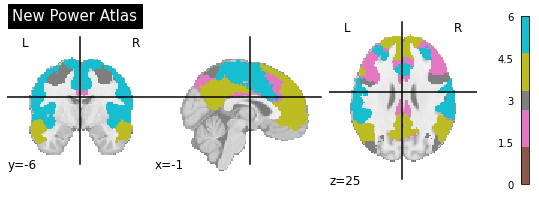

ATLASES/ReLabeled_Atlases/Yeo7Atlas_2ndRSN.nii.gz
no_of_labels= 1
uniqe labels = [2]


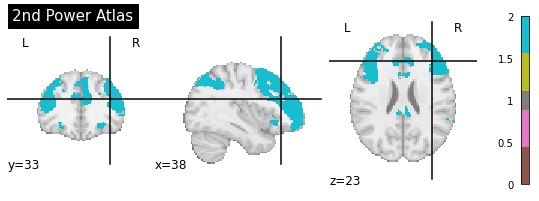

ATLASES/ReLabeled_Atlases/Yeo7Atlas_3rdRSN.nii.gz
no_of_labels= 1
uniqe labels = [3]


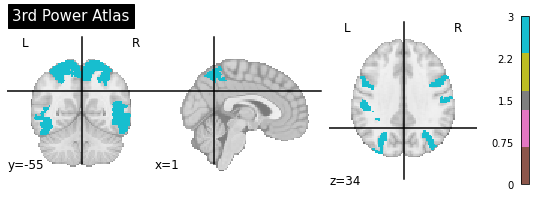

In [16]:
# ===================== Convert Yeo7 Atlas into 6 RSNs ==============================

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array

Six_RSNs_Labels=['1_AUN','2_CCN','3_DAN','4_DMN','5_SMN','6_VAN']

atlasFile='ATLASES/ReLabeled_Atlases/Relabeling_Yeo7_atlas.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)


atlas_img=nib.load(atlasFile)
atlas_data = atlas_img.get_fdata() 
    
atlas_flat = atlas_data.flatten()
atlas_flat=atlas_flat.astype(int)
    
# remove labels 1 and 5
atlas_flat[atlas_flat == 1] = 0
atlas_flat[atlas_flat == 5] = 0

# count = atlas_flat.tolist().count(7)
# print(' no of 7 in array=',count)


# Keep other labels

# narr1=Clear_n_KeepOne(atlas_flat,1)
# narr1=np.array(narr1)
# narr1[narr1 == 1] = 5

# print(' no of 1 in array=',narr1.tolist().count(1))
# count = narr1.tolist().count(5)
# print(' no of 5 in array=',count)

narr2=Clear_n_KeepOne(atlas_flat,2)
narr2=np.array(narr2)
narr2[narr2 == 2] = 5

narr3=Clear_n_KeepOne(atlas_flat,3)
narr3=np.array(narr3)
narr3[narr3 == 3] = 3

narr4=Clear_n_KeepOne(atlas_flat,4)
narr4=np.array(narr4)
narr4[narr4 == 4] = 6

# narr5=Clear_n_KeepOne(atlas_flat,5)
# narr5=np.array(narr5)
# narr5[narr5 == 5] = 4

narr6=Clear_n_KeepOne(atlas_flat,6)
narr6=np.array(narr6)
narr6[narr6 == 6] = 2

narr7=Clear_n_KeepOne(atlas_flat,7)
narr7=np.array(narr7)
narr7[narr7 == 7] = 4


WholeArr=Clear_n_Keep(atlas_flat,[],0)

# Arr=np.array(narr1)
# WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr2)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr3)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr4)
WholeArr=CombineArr(WholeArr,Arr)


# Arr=np.array(narr5)
# WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr6)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr7)
WholeArr=CombineArr(WholeArr,Arr)


WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
this_img.to_filename("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz")

# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


# save_Single_RSN("ATLASES/Yeo7Atlas_6RSNs.nii.gz",1, "ATLASES/Yeo7Atlas_1stRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz",2, "ATLASES/ReLabeled_Atlases/Yeo7Atlas_2ndRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz",3, "ATLASES/ReLabeled_Atlases/Yeo7Atlas_3rdRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz",4, "ATLASES/ReLabeled_Atlases/Yeo7Atlas_4thRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz",5, "ATLASES/ReLabeled_Atlases/Yeo7Atlas_5thRSN.nii.gz")
save_Single_RSN("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz",6, "ATLASES/ReLabeled_Atlases/Yeo7Atlas_6thRSN.nii.gz")

# =================================================================================================
Display_Img_Labels("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/Yeo7Atlas_6RSNs.nii.gz","New Power Atlas")

Display_Img_Labels("ATLASES/ReLabeled_Atlases/Yeo7Atlas_2ndRSN.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/Yeo7Atlas_2ndRSN.nii.gz","2nd Power Atlas")

Display_Img_Labels("ATLASES/ReLabeled_Atlases/Yeo7Atlas_3rdRSN.nii.gz")
plotting_image("ATLASES/ReLabeled_Atlases/Yeo7Atlas_3rdRSN.nii.gz","3rd Power Atlas")

# ....

Original Labels
ATLASES/ReLabeled_Atlases/Relabeling_Shafer_Atlas_17Networks.nii.gz
no_of_labels= 17
uniqe labels = [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz
no_of_labels= 5
uniqe labels = [2 3 4 5 6]


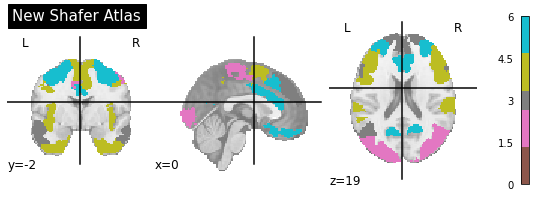

ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz
no_of_labels= 1
uniqe labels = [2]


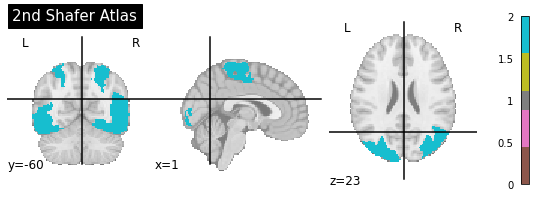

ATLASES/RSNs/Shafer100Atlas_3rdRSN.nii.gz
no_of_labels= 1
uniqe labels = [3]


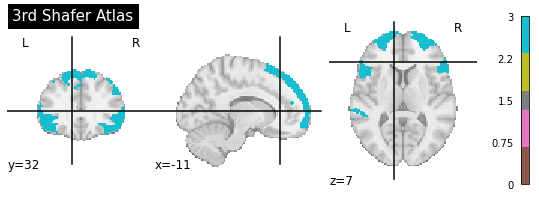

In [17]:
# ===================== Convert Shafer Atlas into 6 RSNs ==============================

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array

Six_RSNs_Labels=['1_AUN','2_CCN','3_DAN','4_DMN','5_SMN','6_VAN']

atlasFile='ATLASES/ReLabeled_Atlases/Relabeling_Shafer_Atlas_17Networks.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)


atlas_img=nib.load(atlasFile)
atlas_data = atlas_img.get_fdata() 
    
atlas_flat = atlas_data.flatten()
atlas_flat=atlas_flat.astype(int)
    
# remove labels 9,10,15,16 and 17
atlas_flat[atlas_flat == 9] = 0
atlas_flat[atlas_flat == 10] = 0
atlas_flat[atlas_flat == 15] = 0
atlas_flat[atlas_flat == 16] = 0
atlas_flat[atlas_flat == 17] = 0

# count = atlas_flat.tolist().count(7)
# print(' no of 7 in array=',count)


# Keep other labels

narr1=Clear_n_KeepOne(atlas_flat,1)
narr1=np.array(narr1)
narr1[narr1 == 1] = 2

narr2=Clear_n_KeepOne(atlas_flat,2)
narr2=np.array(narr2)
narr2[narr2 == 2] = 2

narr3=Clear_n_KeepOne(atlas_flat,3)
narr3=np.array(narr3)
narr3[narr3 == 3] = 2

narr4=Clear_n_KeepOne(atlas_flat,4)
narr4=np.array(narr4)
narr4[narr4 == 4] = 4

narr5=Clear_n_KeepOne(atlas_flat,5)
narr5=np.array(narr5)
narr5[narr5 == 5] = 4

narr6=Clear_n_KeepOne(atlas_flat,6)
narr6=np.array(narr6)
narr6[narr6 == 6] = 4

narr7=Clear_n_KeepOne(atlas_flat,7)
narr7=np.array(narr7)
narr7[narr7 == 7] = 3

narr8=Clear_n_KeepOne(atlas_flat,8)
narr8=np.array(narr8)
narr8[narr8 == 8] = 3

narr11=Clear_n_KeepOne(atlas_flat,11)
narr11=np.array(narr11)
narr11[narr11 == 11] = 6

narr12=Clear_n_KeepOne(atlas_flat,12)
narr12=np.array(narr12)
narr12[narr12 == 12] = 6

narr13=Clear_n_KeepOne(atlas_flat,13)
narr13=np.array(narr13)
narr13[narr13 == 13] = 5

narr14=Clear_n_KeepOne(atlas_flat,14)
narr14=np.array(narr14)
narr14[narr14 == 14] = 5
# =================================================================

WholeArr=Clear_n_Keep(atlas_flat,[],0)

Arr=np.array(narr1)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr2)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr3)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr4)
WholeArr=CombineArr(WholeArr,Arr)


Arr=np.array(narr5)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr6)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr7)
WholeArr=CombineArr(WholeArr,Arr)
Arr=np.array(narr8)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr11)
WholeArr=CombineArr(WholeArr,Arr)
Arr=np.array(narr12)
WholeArr=CombineArr(WholeArr,Arr)

Arr=np.array(narr13)
WholeArr=CombineArr(WholeArr,Arr)
Arr=np.array(narr14)
WholeArr=CombineArr(WholeArr,Arr)

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
this_img.to_filename("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz")

# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


# save_Single_RSN("ATLASES/Shafer100Atlas_6RSNs.nii.gz",1, "ATLASES/Shafer100Atlas_1stRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz",2, "ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz",3, "ATLASES/RSNs/Shafer100Atlas_3rdRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz",4, "ATLASES/RSNs/Shafer100Atlas_4thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz",5, "ATLASES/RSNs/Shafer100Atlas_5thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz",6, "ATLASES/RSNs/Shafer100Atlas_6thRSN.nii.gz")

# =================================================================================================
Display_Img_Labels("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz")
plotting_image("ATLASES/RSNs/Shafer100Atlas_6RSNs.nii.gz","New Shafer Atlas")

Display_Img_Labels("ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz")
plotting_image("ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz","2nd Shafer Atlas")

Display_Img_Labels("ATLASES/RSNs/Shafer100Atlas_3rdRSN.nii.gz")
plotting_image("ATLASES/RSNs/Shafer100Atlas_3rdRSN.nii.gz","3rd Shafer Atlas")

# ....

Original Labels
ATLASES/Org_Atlases/cc200_roi_atlas.nii.gz
no_of_labels= 200
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


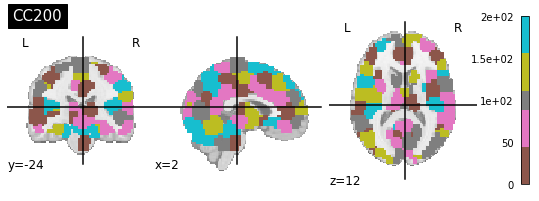

In [63]:
atlasFile='ATLASES/Org_Atlases/cc200_roi_atlas.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)
plotting_image(atlasFile,'CC200')

In [65]:

AUN= [81,82,83,84] # New label 1
SMN= [1,2,19,20,59,60,63,64,69,70]  # New label 5
DMN=[5,6,9,10, 15,16, 7,8, 31,32,33,34,35,36,37,38,39,40,61,62, 65,66,67,68,85,86,87,88,89,90] # New label 4
DAN= [3,4,5,6,7,8,9,10,11,12,13,14,29,30,59,60,61,62,89,90]  # new label 3
VAN= [61,62,7,8, 3,4] # new label 6

All_labels=[81,82,83,84,
     1,2,19,20,59,60,63,64,69,70,
     5,6,9,10, 15,16, 7,8, 31,32,33,34,35,36,37,38,39,40,61,62, 65,66,67,68,85,86,87,88,89,90,
     3,4,5,6,7,8,9,10,11,12,13,14,29,30,59,60,61,62,89,90,
     61,62,7,8, 3,4
    ]

ignord_labels=[]
for i in range(1,201):
    if i not in All_labels:
        ignord_labels.append(i)
        
print('ignored labels=', ignord_labels)

ignored labels= [17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


Original Labels
ATLASES/ReLabeled_Atlases/CC200Atlas_6RSNs.nii.gz
no_of_labels= 5
uniqe labels = [1 3 4 5 6]


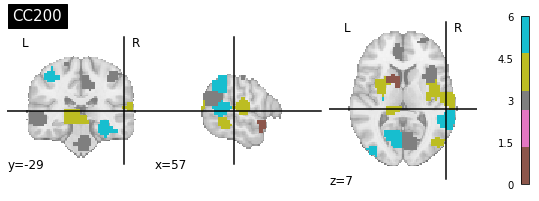

ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz
no_of_labels= 5
uniqe labels = [1 3 4 5 6]


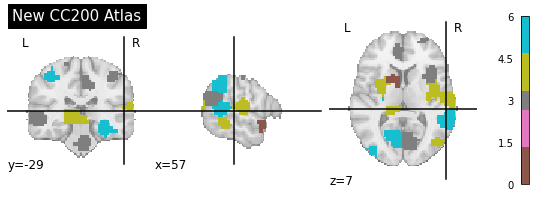

ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz
no_of_labels= 1
uniqe labels = [1]


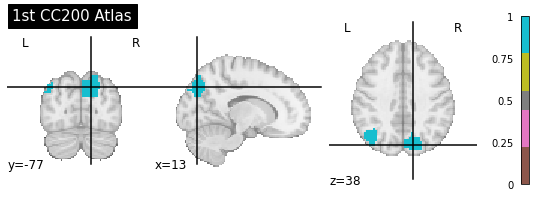

ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz
no_of_labels= 1
uniqe labels = [5]


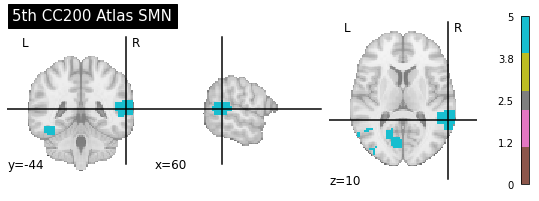

In [8]:
# ===================== Convert CC200 Atlas into 6 RSNs ==============================

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array

Six_RSNs_Labels=['1_AUN','2_CCN','3_DAN','4_DMN','5_SMN','6_VAN']

# AUN= [81,82,83,84] # New label 1
# oldSMN= [1,2,19,20,59,60,63,64,69,70]  # New label 5
# SMN= [1,2,57,58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70 ]

# DMN=[5,6,9,10, 15,16, 31,32,33,34,35,36,37,38,39,40,65,66,67,68,85,86,87,88,89,90] # New label 4
# DAN= [5,6,7,8,9,10,11,12,13,14,29,30,59,60,89,90]  # new label 3
# VAN= [61,62,7,8, 3,4] # new label 6

# All_labels=[81,82,83,84,
#      1,2,19,20,59,60,63,64,69,70,
#      5,6,9,10, 15,16, 7,8, 31,32,33,34,35,36,37,38,39,40,61,62, 65,66,67,68,85,86,87,88,89,90,
#      3,4,5,6,7,8,9,10,11,12,13,14,29,30,59,60,61,62,89,90,
#      61,62,7,8, 3,4
#     ]

# ignord_labels=[]
# for i in range(1,201):
#     if i not in All_labels:
#         ignord_labels.append(i)
        
# print('ignored labels=', ignord_labels)

atlasFile='ATLASES/ReLabeled_Atlases/CC200Atlas_6RSNs.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)
plotting_image(atlasFile,'CC200')

atlas_img=nib.load(atlasFile)
atlas_data = atlas_img.get_fdata() 
    
atlas_flat = atlas_data.flatten()
atlas_flat=atlas_flat.astype(int)
    
# remove all labels in ignord_labels
# for i in ignord_labels:
#     atlas_flat[atlas_flat == i] = 0
    
    
#   atlas_flat[atlas_flat == 5] = 0


# -------------------- Keep other labels ------------------------
# WArr1=Clear_n_Keep(atlas_flat,[],0)

# for i in AUN:
#     narr1=Clear_n_KeepOne(atlas_flat,i)
#     narr1=np.array(narr1)
#     narr1[narr1 == i] = 1
#     Arr=np.array(narr1)
#     WArr1=CombineArr(WArr1,Arr)

# print(' no of 1 in array=',narr1.tolist().count(1))
# count = narr1.tolist().count(5)
# print(' no of 5 in array=',count)
# -----------------------------------------------------------------------
# WArr2=Clear_n_Keep(atlas_flat,[],0)

# for i in SMN:
#     narr2=Clear_n_KeepOne(atlas_flat,i)
#     narr2=np.array(narr2)
#     narr2[narr2 == i] = 5
#     Arr=np.array(narr2)
#     WArr2=CombineArr(WArr2,Arr)

# ----------------------------------------------------------------------------
# WArr3=Clear_n_Keep(atlas_flat,[],0)

# for i in DMN:
#     narr3=Clear_n_KeepOne(atlas_flat,i)
#     narr3=np.array(narr3)
#     narr3[narr3 == i] = 4
#     Arr=np.array(narr3)
#     WArr3=CombineArr(WArr3,Arr)
# -------------------------------------------------------------------
# WArr4=Clear_n_Keep(atlas_flat,[],0)

# for i in DAN:
#     narr4=Clear_n_KeepOne(atlas_flat,i)
#     narr4=np.array(narr4)
#     narr4[narr4 == i] = 3
#     Arr=np.array(narr4)
#     WArr4=CombineArr(WArr4,Arr)

# narr5=Clear_n_KeepOne(atlas_flat,5)
# narr5=np.array(narr5)
# narr5[narr5 == 5] = 4
# ---------------------------------------------------------------------
# WArr5=Clear_n_Keep(atlas_flat,[],0)

# for i in VAN:
#     narr5=Clear_n_KeepOne(atlas_flat,i)
#     narr5=np.array(narr5)
#     narr5[narr5 == i] = 6
#     Arr=np.array(narr5)
#     WArr5=CombineArr(WArr5,Arr)

# ==================================================================================

# WholeArr=Clear_n_Keep(atlas_flat,[],0)

# Arr=np.array(WArr1)
# WholeArr=CombineArr(WholeArr,Arr)

# Arr=np.array(WArr2)
# WholeArr=CombineArr(WholeArr,Arr)

# Arr=np.array(WArr3)
# WholeArr=CombineArr(WholeArr,Arr)

# Arr=np.array(WArr4)
# WholeArr=CombineArr(WholeArr,Arr)


# Arr=np.array(WArr5)
# WholeArr=CombineArr(WholeArr,Arr)

# ----------------------------------------------------------------

# WholeArr=np.array(WholeArr)
# # -----------------------------------------------------------------
# WholeArr=np.asarray(WholeArr, dtype = np.float32, order ='C')
# # Get the NIfTI header
# Newheader = atlas_img.header

# # Update the data type in the header

# Newheader.set_data_dtype('float32')

# ----------------------------------------------------------------------
# newAtlas=WholeArr.reshape(atlas_data.shape)
# this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=Newheader)

newAtlas=atlas_flat.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header) 
this_img.to_filename("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz")

# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


# save_Single_RSN("ATLASES/CC200_6RSNs.nii.gz",2, "ATLASES/CC200Atlas_1stRSN.nii.gz")

save_Single_RSN("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz",1, "ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz",3, "ATLASES/RSNs/CC200Atlas_3rdRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz",4, "ATLASES/RSNs/CC200Atlas_4thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz",5, "ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz",6, "ATLASES/RSNs/CC200Atlas_6thRSN.nii.gz")

# =================================================================================================
Display_Img_Labels("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz")
plotting_image("ATLASES/RSNs/KK_CC200Atlas_6RSNs.nii.gz","New CC200 Atlas")

Display_Img_Labels("ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz")
plotting_image("ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz","1st CC200 Atlas")

Display_Img_Labels("ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz")
plotting_image("ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz","5th CC200 Atlas SMN")

# ....

Original Labels
ATLASES/ReLabeled_Atlases/Relabeling_Doucet2018_Atlas.nii.gz
no_of_labels= 10
uniqe labels = [ 1  2  3  4  5  6  7  8  9 10]


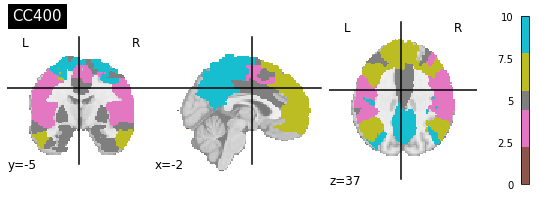

In [9]:
atlasFile='ATLASES/ReLabeled_Atlases/Relabeling_Doucet2018_Atlas.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)
plotting_image(atlasFile,'CC400')

file name= ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 2]
file name= ATLASES/RSNs/Yeo7Atlas_3rdRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 3]
file name= ATLASES/RSNs/CC200Atlas_4thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 4]
file name= ATLASES/RSNs/Shafer100Atlas_5thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 5]
file name= ATLASES/RSNs/PowerAtlas_6thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 6]
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

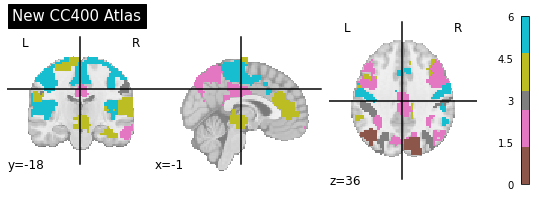

ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz
no_of_labels= 1
uniqe labels = [1]


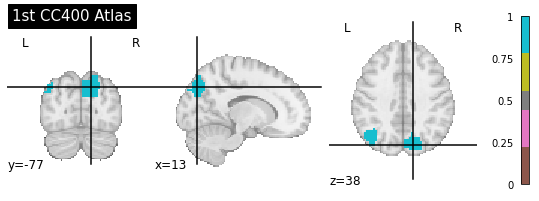

ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz
no_of_labels= 1
uniqe labels = [3]


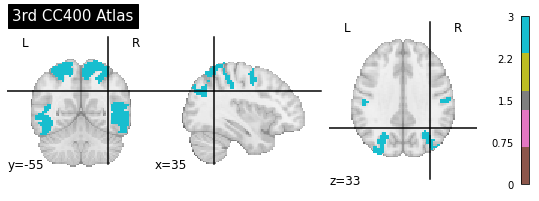

In [73]:
# ============================================== OLD Build CC400  =============================================

import math
import numpy as np
import nibabel as nib
import nilearn.image as nlimg


# DMNL = [
#         "ATLASES/RSNs/CC200Atlas_1stRSN.nii.gz",
#         "ATLASES/RSNs/Shafer100Atlas_2ndRSN.nii.gz",
#         "ATLASES/RSNs/Yeo7Atlas_3rdRSN.nii.gz",
#         "ATLASES/RSNs/CC200Atlas_4thRSN.nii.gz",
#         "ATLASES/RSNs/Shafer100Atlas_5thRSN.nii.gz",
#          "ATLASES/RSNs/PowerAtlas_6thRSN.nii.gz"
#         ]


def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img
# ==================================================================

atlasFile='ATLASES/ReLabeled_Atlases/Relabeling_Doucet2018_Atlas.nii.gz'
print('Original Labels')
Display_Img_Labels(atlasFile)
plotting_image(atlasFile,'CC400')

atlas_img=nib.load(atlasFile)
atlas_data = atlas_img.get_fdata() 
    
atlas_flat = atlas_data.flatten()
atlas_flat=atlas_flat.astype(int)


arr = np.array(DMNL)

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(arr[0],1,arr[0])
WholeArr=Clear_n_Keep(atlas_flat,[],0)


Atl1,X,Y= Get_ArrayLabel(arr[0],1,arr[0])
Atl2,X,Y= Get_ArrayLabel(arr[1],2,arr[0])
Atl3,X,Y= Get_ArrayLabel(arr[2],3,arr[0])   
Atl4,X,Y= Get_ArrayLabel(arr[3],4,arr[0])
Atl5,X,Y= Get_ArrayLabel(arr[4],5,arr[0])
Atl6,X,Y= Get_ArrayLabel(arr[5],6,arr[0])

WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)
WholeArr=CombineArr(WholeArr,Atl3)
WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
WholeArr=CombineArr(WholeArr,Atl6)

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
this_img.to_filename("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz")
    
# Display_Img_Labels("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz")
# plotting_image("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz","CC400 Atlas")
   
    
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",1, "ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",2, "ATLASES/RSNs/CC400Atlas_2ndRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",3, "ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",4, "ATLASES/RSNs/CC400Atlas_4thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",5, "ATLASES/RSNs/CC400Atlas_5thRSN.nii.gz")
save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",6, "ATLASES/RSNs/CC400Atlas_6thRSN.nii.gz")

# =================================================================================================
Display_Img_Labels("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz")
plotting_image("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz","New CC400 Atlas")

Display_Img_Labels("ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz")
plotting_image("ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz","1st CC400 Atlas")

Display_Img_Labels("ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz")
plotting_image("ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz","3rd CC400 Atlas")

# ....

In [10]:
import nibabel as nib

# Load the brain atlas
atlas_img = nib.load("ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz")

# Get the atlas data and affine transformation matrix
atlas_data = atlas_img.get_fdata()
atlas_affine = atlas_img.affine

# Convert fMRI coordinates to atlas space
fmri_coords = [(1, 2, 1), (2,4,5)]  # Replace with your fMRI coordinates
atlas_coords = nib.affines.apply_affine(nib.affines.invert_affine(atlas_affine), fmri_coords)

# Label the atlas based on the coordinates
labels = []
for coord in atlas_coords:
    voxel_value = atlas_data[int(coord[0]), int(coord[1]), int(coord[2])]
    label = atlas_img.header.get_index_label(voxel_value)
    labels.append(label)

# Print the labels for each coordinate
for label in labels:
    print(label)


AttributeError: module 'nibabel.affines' has no attribute 'invert_affine'

In [11]:
import nibabel as nib

# Load the brain atlas file
atlas_file = nib.load("ATLASES/RSNs/CC200Atlas_5thRSN.nii.gz")

# Extract the label information
atlas_data = atlas_file.get_fdata()
label_names = atlas_file.header.get_index_map(1).get_labels()
label_ids = atlas_file.header.get_index_map(1).get_id()

print('label_names ',label_names)
print('label_ids', label_ids)

# Filter labels and select a specific label of interest
target_label_name = 'Desired Label'
target_label_id = label_ids[label_names.index(target_label_name)]

# Get the coordinates for the selected label
label_coords = atlas_data == target_label_id
coord_indices = [i for i, val in enumerate(label_coords.flatten()) if val]
xyz_coords = [nib.affines.apply_affine(atlas_file.affine, (ind % atlas_data.shape[0], (ind // atlas_data.shape[0]) % atlas_data.shape[1], ind // (atlas_data.shape[0] * atlas_data.shape[1])))[::-1] for ind in coord_indices]

# Print the coordinates
for coords in xyz_coords:
    print(f"Coordinate: {coords}")


AttributeError: 'Nifti1Header' object has no attribute 'get_index_map'

In [14]:
import numpy as np
>>> from scipy import stats
>>> res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
>>> res
# PearsonRResult(statistic=-0.7426106572325056, pvalue=0.15055580885344558)
# >>> res.confidence_interval(0)
# ConfidenceInterval(low=-0.9816918044786463, high=0.40501116769030976)

AttributeError: 'tuple' object has no attribute 'confidence_interval'

ATLASES/Doucet_2018_13_NWs/NTW01.nii
no_of_labels= 1
uniqe labels = [1]


C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


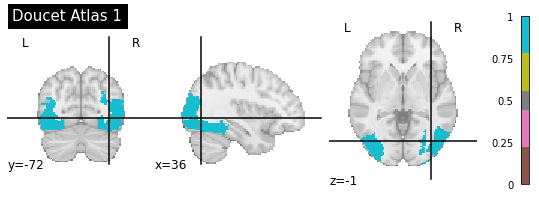

In [6]:
# --------------------------- Doucet_2018 -------------------------
File1="ATLASES/Doucet_2018_13_NWs/NTW01.nii"
Display_Img_Labels(File1)
plotting_image(File1,"Doucet Atlas 1")


ATLASES/Doucet_2018_13_NWs/NTW02.nii
no_of_labels= 1
uniqe labels = [1]


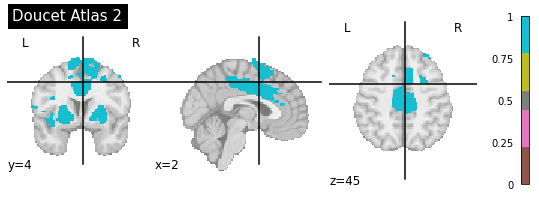

In [7]:
File1="ATLASES/Doucet_2018_13_NWs/NTW02.nii"
Display_Img_Labels(File1)
plotting_image(File1,"Doucet Atlas 2")


file name= ATLASES/Doucet_2018_13_NWs/NTW01.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW01.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW02.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW03.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW04.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW05.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW07.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW09.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW11.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW12.nii
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/Doucet_2018_13_NWs/NTW13.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/Doucet_2018_13_NWs/Doucet2018_10NTW.nii.gz
no_of_labels= 

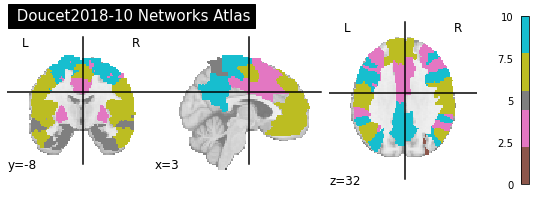

In [12]:
# ============================================== Build Doucet 2018   =============================================

import math
import numpy as np
import nibabel as nib
import nilearn.image as nlimg


Doucet = [
        "ATLASES/Doucet_2018_13_NWs/NTW01.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW02.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW03.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW04.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW05.nii",
        " ",                       # "ATLASES/Doucet_2018_13_NWs/NTW06.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW07.nii",
        " ",                      # "ATLASES/Doucet_2018_13_NWs/NTW08.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW09.nii",
        " ",                      # "ATLASES/Doucet_2018_13_NWs/NTW10.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW11.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW12.nii",
        "ATLASES/Doucet_2018_13_NWs/NTW13.nii"
        ]


def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img
# ==================================================================
arr = np.array(Doucet)

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(arr[0],1,arr[0])
WholeArr=Clear_n_Keep(atlas_flat,[],0)


Atl1,X,Y= Get_ArrayLabel(arr[0],1,arr[0])
Atl2,X,Y= Get_ArrayLabel(arr[1],2,arr[0])
Atl3,X,Y= Get_ArrayLabel(arr[2],3,arr[0])   
Atl4,X,Y= Get_ArrayLabel(arr[3],4,arr[0])
Atl5,X,Y= Get_ArrayLabel(arr[4],5,arr[0])
# Atl6,X,Y= Get_ArrayLabel(arr[5],6,arr[0])
Atl7,X,Y= Get_ArrayLabel(arr[6],6,arr[0])
# Atl8,X,Y= Get_ArrayLabel(arr[7],8,arr[0])
Atl9,X,Y= Get_ArrayLabel(arr[8],7,arr[0])   
# Atl10,X,Y= Get_ArrayLabel(arr[9],10,arr[0])
Atl11,X,Y= Get_ArrayLabel(arr[10],8,arr[0])
Atl12,X,Y= Get_ArrayLabel(arr[11],9,arr[0])
Atl13,X,Y= Get_ArrayLabel(arr[12],10,arr[0])


WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)
WholeArr=CombineArr(WholeArr,Atl3)
WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
# WholeArr=CombineArr(WholeArr,Atl6)
WholeArr=CombineArr(WholeArr,Atl7)
# WholeArr=CombineArr(WholeArr,Atl8)
WholeArr=CombineArr(WholeArr,Atl9)
# WholeArr=CombineArr(WholeArr,Atl10)
WholeArr=CombineArr(WholeArr,Atl11)
WholeArr=CombineArr(WholeArr,Atl12)
WholeArr=CombineArr(WholeArr,Atl13)


WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
this_img.to_filename("ATLASES/Doucet_2018_13_NWs/Doucet2018_10NTW.nii.gz")
    
# Display_Img_Labels("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz")
# plotting_image("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz","CC400 Atlas")
   
    
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",1, "ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz")
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",2, "ATLASES/RSNs/CC400Atlas_2ndRSN.nii.gz")
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",3, "ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz")
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",4, "ATLASES/RSNs/CC400Atlas_4thRSN.nii.gz")
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",5, "ATLASES/RSNs/CC400Atlas_5thRSN.nii.gz")
# save_Single_RSN("ATLASES/RSNs/CC400Atlas_6RSNs.nii.gz",6, "ATLASES/RSNs/CC400Atlas_6thRSN.nii.gz")

# =================================================================================================
F="ATLASES/Doucet_2018_13_NWs/Doucet2018_10NTW.nii.gz"
Display_Img_Labels(F)
plotting_image(F," Doucet2018-10 Networks Atlas")

# Display_Img_Labels("ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz")
# plotting_image("ATLASES/RSNs/CC400Atlas_1stRSN.nii.gz","1st CC400 Atlas")

# Display_Img_Labels("ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz")
# plotting_image("ATLASES/RSNs/CC400Atlas_3rdRSN.nii.gz","3rd CC400 Atlas")

# ....

file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg01.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg01.nii
file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg01.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg02.nii
file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg02.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg03.nii
file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg03.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg04.nii
file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg04.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg05.nii
file name= ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_RSN02_AAL_Reg05.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/DAN_byMe/CAREN_

C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


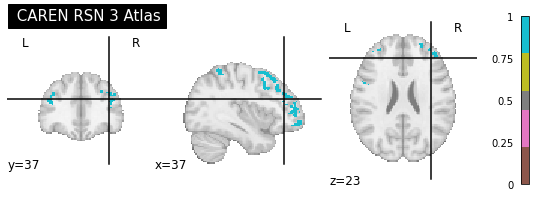

In [4]:
# ============================================== Build CAREN Atlas 2022   =============================================

import os
import math
import numpy as np
import nibabel as nib
import nilearn.image as nlimg

from nilearn import plotting
# import numpy as np
import pandas as pd
# import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array
# ===================================================
def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
            print('Error in Combination')
           
    return (new_array)
# ============================================
def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img
# ==================================================================
def Clear_n_Keep(Arr,RemoveList, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] in RemoveList:
            new_array[i]=KeepValue

    return new_array
# ==============================================================================
def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
# ===================================================
RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'


# F="ATLASES/CAREN_byAALRegion/RSN01/"  #CAREN_RSN01_AAL_Reg02.nii
# F="ATLASES/CAREN_byAALRegion/RSN02/"
# F="ATLASES/CAREN_byAALRegion/RSN03/"
# F="ATLASES/CAREN_byAALRegion/AUD_byMe/"
# F="ATLASES/CAREN_byAALRegion/RSN04/"
F="ATLASES/CAREN_byAALRegion/DAN_byMe/"

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(F+'CAREN_RSN02_AAL_Reg01.nii',0,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat,[],0)

i=0
FileList= os.listdir(F)

for file in FileList:
    PathF= F + file
    print(PathF)
    Atl1,X,Y= Get_ArrayLabel(PathF,1,RefAtlas)
    WholeArr=CombineArr(WholeArr,Atl1)
    i=i+1
    
WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="ATLASES/CAREN_byAALRegion/CAREN_R2_DAN_3rdRSN.nii.gz"
this_img.to_filename(SaveFile)    



Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CAREN RSN 3 Atlas")

file name= ATLASES/RSNs/CAREN_R_AUD_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CAREN_R_AUD_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CAREN_R2_CCN_2ndRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CAREN_R4_DMN_4thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CAREN_R3_SMN_5thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= ATLASES/RSNs/CAREN_R1_VAN_6thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/RSNs/CAREN_Atlas_6RSNs.nii.gz
no_of_labels = 5
uniqe labels = [1 2 4 5 6]
No. of Non-Zero Voxels = 30295
Size of brain Atlas (No. of Voxels) = 902629


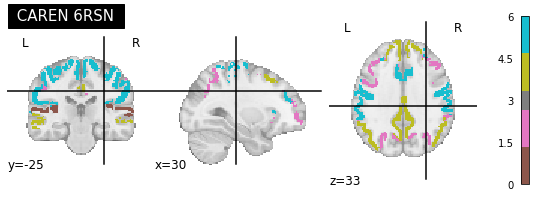

In [35]:
# --------------- Combine CAREN Regions into Single CAREN_6RSNs ----------------

def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
            print('Error in Combination')
           
    return (new_array)
# ============================================
def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img
# ===================================================
RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'

F1="ATLASES/RSNs/CAREN_R_AUD_1stRSN.nii.gz"  #CAREN_RSN01_AAL_Reg02.nii
F2="ATLASES/RSNs/CAREN_R2_CCN_2ndRSN.nii.gz"
F4="ATLASES/RSNs/CAREN_R4_DMN_4thRSN.nii.gz"
F5="ATLASES/RSNs/CAREN_R3_SMN_5thRSN.nii.gz"
F6="ATLASES/RSNs/CAREN_R1_VAN_6thRSN.nii.gz"

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(F1,0,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat,[],0)

Atl1,X,Y= Get_ArrayLabel(F1,1,RefAtlas)
Atl2,X,Y= Get_ArrayLabel(F2,2,RefAtlas)
Atl4,X,Y= Get_ArrayLabel(F4,4,RefAtlas)
Atl5,X,Y= Get_ArrayLabel(F5,5,RefAtlas)
Atl6,X,Y= Get_ArrayLabel(F6,6,RefAtlas)

WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)

WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
WholeArr=CombineArr(WholeArr,Atl6)

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="ATLASES/RSNs/CAREN_Atlas_6RSNs.nii.gz"
this_img.to_filename(SaveFile)

Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CAREN 6RSN ")

In [25]:
import nibabel as nib

def Display_Image_Info(ImageFile):
    
    # Load the NIfTI image file
    nifti_image = nib.load(ImageFile)

    # Access the header information
    header = nifti_image.header

    # Display the basic image information
    print("Image shape:", nifti_image.shape)
    print("Data type:", header.get_data_dtype())
    print("Voxel dimensions:", header.get_zooms())
    print("Number of volumes:", header.get_data_shape()[-1])

    # Access additional header fieldsImgFile="ATLASES/Org_Atlases/K1_Yeo2011_7Networks_thick_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz"

    print("Header fields:")
    print(header.keys())

    # Display a specific header field
    print("Voxel-to-world affine matrix:")
    print(header.get_best_affine())

ImgFile="ATLASES/Org_Atlases/K2_PowerAtlas_10Networks.nii.gz"
RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'
Display_Image_Info(RefAtlas)
Display_Img_Labels(RefAtlas)

Image shape: (91, 109, 91)
Data type: float32
Voxel dimensions: (2.0, 2.0, 2.0)
Number of volumes: 91
Header fields:
['sizeof_hdr', 'data_type', 'db_name', 'extents', 'session_error', 'regular', 'dim_info', 'dim', 'intent_p1', 'intent_p2', 'intent_p3', 'intent_code', 'datatype', 'bitpix', 'slice_start', 'pixdim', 'vox_offset', 'scl_slope', 'scl_inter', 'slice_end', 'slice_code', 'xyzt_units', 'cal_max', 'cal_min', 'slice_duration', 'toffset', 'glmax', 'glmin', 'descrip', 'aux_file', 'qform_code', 'sform_code', 'quatern_b', 'quatern_c', 'quatern_d', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'srow_x', 'srow_y', 'srow_z', 'intent_name', 'magic']
Voxel-to-world affine matrix:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz
no_of_labels = 10
uniqe labels = [ 1  2  3  4  5  6  7  8  9 10]
No. of Non-Zero Voxels = 18387
Size of brain Atlas (No. of Voxels) = 902629


file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg01.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg01.nii
file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg01.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg02.nii
file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg02.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg03.nii
file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg03.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg04.nii
file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg04.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg05.nii
file name= ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg05.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN01/CAREN_RSN01_AAL_Reg06.nii
file name= ATLAS

ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg31.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg31.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg32.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg32.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg33.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg33.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg34.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg34.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg37.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg37.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg38.nii
file name= ATLASES/CAREN_byAALRegion/RSN02/CAREN_RSN02_AAL_Reg38.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_by

ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg71.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg71.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg72.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg72.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg73.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg73.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg74.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg74.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg87.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg87.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg88.nii
file name= ATLASES/CAREN_byAALRegion/RSN03/CAREN_RSN03_AAL_Reg88.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_by

ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg43.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg43.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg44.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg44.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg47.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg47.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg48.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg48.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg49.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg49.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg50.nii
file name= ATLASES/CAREN_byAALRegion/RSN04/CAREN_RSN04_AAL_Reg50.nii
no_of_labels= 2
uniqe labels = [0 1]
ATLASES/CAREN_by

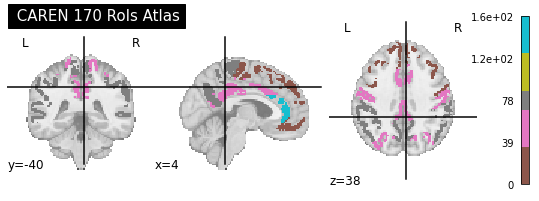

In [19]:
# ============================================== Build CAREN Atlas 2022 as 170 Labels   =============================================

import os
import math
import numpy as np
import nibabel as nib
import nilearn.image as nlimg

from nilearn import plotting
# import numpy as np
import pandas as pd
# import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()

def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array
# ===================================================
def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
            print('Error in Combination')
           
    return (new_array)
# ============================================
def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img
# ==================================================================
def Clear_n_Keep(Arr,RemoveList, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] in RemoveList:
            new_array[i]=KeepValue

    return new_array
# ==============================================================================
def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
# ===================================================
RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'


Flist= ["ATLASES/CAREN_byAALRegion/RSN01/",       
        "ATLASES/CAREN_byAALRegion/RSN02/",
        "ATLASES/CAREN_byAALRegion/RSN03/",
        "ATLASES/CAREN_byAALRegion/AUD_byMe/",
        "ATLASES/CAREN_byAALRegion/RSN04/",
        "ATLASES/CAREN_byAALRegion/DAN_byMe/"]
Flabel=[6, 2, 5, 1, 4, 3]

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel("ATLASES/CAREN_byAALRegion/RSN01/"+'CAREN_RSN01_AAL_Reg01.nii',0,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat,[],0)

i=0
List=[]
for F in Flist:
    FileList= os.listdir(F)
    print('====================================================')
    for file in FileList:
        PathF= F + file
        print(PathF)
        last3_chars = PathF[-7:-4]
        if not last3_chars.isnumeric():
            last3_chars = PathF[-6:-4]
            
        No=int(last3_chars)
        Atl1,X,Y= Get_ArrayLabel(PathF,No,RefAtlas)
        WholeArr=CombineArr(WholeArr,Atl1)
        
        
    
WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="ATLASES/CAREN_byAALRegion/CAREN_170_RoIs.nii.gz"
this_img.to_filename(SaveFile)    



Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CAREN 170 RoIs Atlas")

Image Dim=(91, 109, 91)
CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz
no_of_labels = 1
uniqe labels = [1]
No. of Non-Zero Voxels = 1636
Size of brain Atlas (No. of Voxels) = 902629


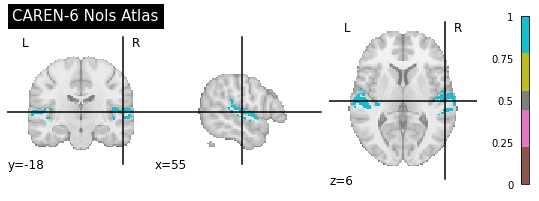

In [74]:
# ==============================================================================
def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]
    print(f"Image Dim={atlas_img.shape}")

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
#----- function for plotting-------------------
def plotting_image(img,MAP, Title):
    plotting.plot_stat_map(
    img, cmap=MAP,
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
   
# ===================================================
# F='CAREN_byAALRegion_Combined/CAREN_170_RoIs.nii.gz'
# F='CAREN_byAALRegion_Combined/CAREN_80_RoIs.nii.gz'
F1='CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz'
F2='CAREN_byAALRegion_Combined/CAREN_R2_CCN_2ndRSN.nii.gz'
F3='CAREN_byAALRegion_Combined/CAREN_R2_DAN_3rdRSN.nii.gz'
F4='CAREN_byAALRegion_Combined/CAREN_R4_DMN_4thRSN.nii.gz'
F5='CAREN_byAALRegion_Combined/CAREN_R3_SMN_5thRSN.nii.gz'
F6='CAREN_byAALRegion_Combined/CAREN_R1_VAN_6thRSN.nii.gz'

# --------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# colors = ['#FF0000', '#FF9900', '#FFFF00', '#33FF33', '#0000FF', '#9900CC']
colors=['red','green','blue','orange','pink','brown']
def create_custom_colormap(colors):
    cmap = LinearSegmentedColormap.from_list('custom_colormap', colors, N=len(colors))
    return cmap
MyColorMap=create_custom_colormap(colors)
# -------------------------------------------------------------------
# F1='Caren-1/CAREN_5RSNS.nii'
# F1='CAREN_byAALRegion_Combined/CAREN_Atlas_6RSNs.nii.gz'
Display_Img_Labels(F1)
plotting_image(F1, 'tab10',"CAREN-6 NoIs Atlas")


# plotting_image(F1,"CAREN- AUD NoIs Atlas")
# plotting.plot_roi(F1, cmap='autumn', title="CAREN- AUD NoIs Atlas")
# plotting.plot_roi(F2, cmap='summer', title="CAREN- CCN NoIs Atlas")
# plotting.plot_roi(F3, cmap='winter', title="CAREN- DAN NoIs Atlas")
# plotting.plot_roi(F4, cmap='spring', title="CAREN- DMN NoIs Atlas")
# plotting.plot_roi(F5, cmap='cool', title="CAREN- SMN NoIs Atlas")
# plotting.plot_roi(F6, cmap='Wistia', title="CAREN- VAN NoIs Atlas")


# plotting_image(F2," CAREN- CCN NoIs Atlas")
# plotting_image(F3," CAREN- DAN NoIs Atlas")
# plotting_image(F4," CAREN- DMN NoIs Atlas")
# plotting_image(F5," CAREN- SMN NoIs Atlas")
# plotting_image(F6," CAREN- VAN NoIs Atlas")


Image Dim=(182, 218, 182)
RefBrain/MNI152NLin6_res-1x1x1_T1w_descr-brain.nii.gz
no_of_labels = 6187
uniqe labels = [1738 1770 1781 ... 8359 8362 8364]
No. of Non-Zero Voxels = 1827095
Size of brain Atlas (No. of Voxels) = 7221032


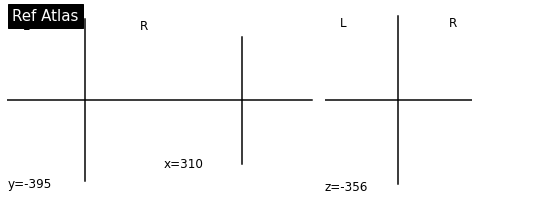

In [77]:
Ref1='RefBrain/MNI152NLin6_res-1x1x1_T1w.nii.gz'
F1='RefBrain/MNI152NLin6_res-1x1x1_T1w_descr-brain.nii.gz'
Display_Img_Labels(F1)
plotting_image(F1, 'tab10',"Ref Atlas")


file name= CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/2_CAREN_R2_CCN_2ndRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/3_CAREN_R2_DAN_3rdRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/4_CAREN_R4_DMN_4thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/5_CAREN_R3_SMN_5thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
file name= CAREN_byAALRegion_Combined/6_CAREN_R1_VAN_6thRSN.nii.gz
no_of_labels= 2
uniqe labels = [0 1]
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
E

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Comb

Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Error in Combination
Image Dim=(182, 218, 182)
CAREN_byAALRegion_Combined/666_HexaNet_CRN_Atlas_6RSNs.nii.gz
no_of_labels = 6
uniqe labels = [1 2 3 4 5 6]
No. of Non-Zero Voxels = 242360
Size of brain Atlas (No. of Voxels) = 7221032


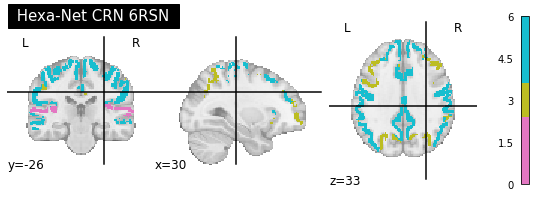

In [99]:
# --------------- Combine CAREN Regions into Single CAREN_6RSNs ----------------
import math
import numpy as np
import nibabel as nib
import nilearn.image as nlimg

def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
            print('Error in Combination')
           
    return (new_array)
# ============================================
def Get_ArrayLabel(atlasFile, Label, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
    Ref_img=nib.load(RefAtlasFile)
    atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img

# ==================================================================
def Clear_n_Keep(Arr,RemoveList, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] in RemoveList:
            new_array[i]=KeepValue

    return new_array
# ===================================================
RefAtlas='RefBrain/MNI152NLin6_res-1x1x1_T1w.nii.gz'

F1="CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz"  
F2="CAREN_byAALRegion_Combined/2_CAREN_R2_CCN_2ndRSN.nii.gz"
F3="CAREN_byAALRegion_Combined/3_CAREN_R2_DAN_3rdRSN.nii.gz"
F4="CAREN_byAALRegion_Combined/4_CAREN_R4_DMN_4thRSN.nii.gz"
F5="CAREN_byAALRegion_Combined/5_CAREN_R3_SMN_5thRSN.nii.gz"
F6="CAREN_byAALRegion_Combined/6_CAREN_R1_VAN_6thRSN.nii.gz"

atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(F1,0,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat,[],0)

Atl1,X,Y= Get_ArrayLabel(F1,1,RefAtlas)
Atl2,X,Y= Get_ArrayLabel(F2,2,RefAtlas)
Atl3,X,Y= Get_ArrayLabel(F3,3,RefAtlas)
Atl4,X,Y= Get_ArrayLabel(F4,4,RefAtlas)
Atl5,X,Y= Get_ArrayLabel(F5,5,RefAtlas)
Atl6,X,Y= Get_ArrayLabel(F6,6,RefAtlas)

WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)
WholeArr=CombineArr(WholeArr,Atl3)
WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
WholeArr=CombineArr(WholeArr,Atl6)

WholeArr=np.array(WholeArr)
WholeArr = WholeArr.astype(int)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="CAREN_byAALRegion_Combined/666_HexaNet_CRN_Atlas_6RSNs.nii.gz"
this_img.to_filename(SaveFile)

Display_Img_Labels(SaveFile)
plotting_image(SaveFile,'tab10'," Hexa-Net CRN 6RSN ")

Image Dim=(182, 218, 182)
CAREN_byAALRegion_Combined/666_HexaNet_CRN_Atlas_6RSNs.nii.gz
no_of_labels = 6
uniqe labels = [1 2 3 4 5 6]
No. of Non-Zero Voxels = 242360
Size of brain Atlas (No. of Voxels) = 7221032


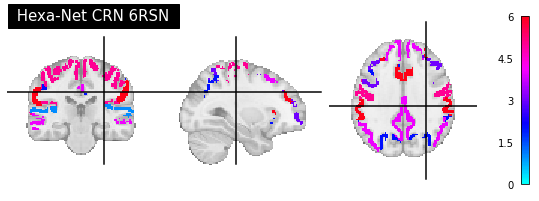

In [111]:
from mycolorpy import colorlist as mcp

#----- function for plotting-------------------
from matplotlib import colors
def plotting_image(img,MAP, Title):
    plotting.plot_stat_map(
    img, 
    cmap=MAP,
    display_mode='ortho',
    annotate=False,
    symmetric_cbar="auto",
    colorbar=True,
    title=Title)
    plotting.show()
# ------------------------------------------------


Display_Img_Labels(SaveFile)
plotting_image(SaveFile,'hsv'," Hexa-Net CRN 6RSN ")

TypeError: Invalid shape (91, 109, 91) for image data

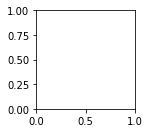

In [118]:
# Import the necessary libraries.
import matplotlib.pyplot as plt
import nibabel as nib

F1="CAREN_byAALRegion_Combined/1_CAREN_R_AUD_1stRSN.nii.gz"  
F2="CAREN_byAALRegion_Combined/2_CAREN_R2_CCN_2ndRSN.nii.gz"
F3="CAREN_byAALRegion_Combined/3_CAREN_R2_DAN_3rdRSN.nii.gz"
F4="CAREN_byAALRegion_Combined/4_CAREN_R4_DMN_4thRSN.nii.gz"
F5="CAREN_byAALRegion_Combined/5_CAREN_R3_SMN_5thRSN.nii.gz"
F6="CAREN_byAALRegion_Combined/6_CAREN_R1_VAN_6thRSN.nii.gz"

# Load the brain atlases.
atlas1 = nib.load(F1)
atlas2 = nib.load(F2)
atlas3 = nib.load(F3)
atlas4 = nib.load(F4)
atlas5 = nib.load(F5)
atlas6 = nib.load(F6)
# Create a figure.
fig = plt.figure()
# Add the brain atlases to the figure.
ax1 = fig.add_subplot(2, 3, 1)
ax1.imshow(atlas1.get_fdata())
ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(atlas2.get_fdata())
ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(atlas3.get_fdata())
ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(atlas4.get_fdata())
ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(atlas5.get_fdata())
ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(atlas6.get_fdata())
# Set the axes labels.
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax5.set_xlabel('x')
ax5.set_ylabel('y')
ax6.set_xlabel('x')
ax6.set_ylabel('y')
# Set the title.
plt.title('Brain Atlases')
# Save the figure.
plt.savefig('brain_atlases.png')

ATLASES/CAREN_byAALRegion/CAREN_170_RoIs.nii.gz
no_of_labels = 79
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  19  20
  21  22  23  24  28  29  30  31  32  33  34  37  38  39  40  43  44  47
  48  49  50  51  52  53  54  55  56  57  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  78  83  84  85  86  87  88  89  90  93
  94 151 152 153 154 155 156]
No. of Non-Zero Voxels = 30295
Size of brain Atlas (No. of Voxels) = 902629
file name= ATLASES/CAREN_byAALRegion/CAREN_170_RoIs.nii.gz
no_of_labels= 80
uniqe labels = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  19
  20  21  22  23  24  28  29  30  31  32  33  34  37  38  39  40  43  44
  47  48  49  50  51  52  53  54  55  56  57  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  78  83  84  85  86  87  88  89  90
  93  94 151 152 153 154 155 156]
ATLASES/CAREN_byAALRegion/CAREN_80_RoIs.nii.gz
no_of_labels = 79
uniqe labels = [ 1  2  3  4  5  6  7  8

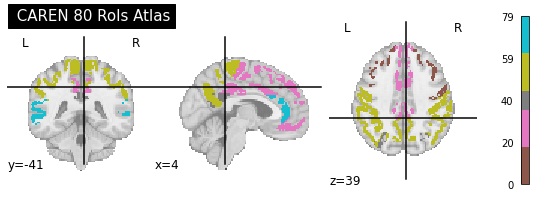

In [22]:
# ==============================================================================
def Get_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
    return no_of_labels, uniq_labels, atlas_flat
# ========================================================================================
def Clear_n_KeepOne(Arr, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] == KeepValue:
            new_array[i]=KeepValue
        else:
            new_array[i]=0

    return new_array
# ==============================================================================

SaveFile="ATLASES/CAREN_byAALRegion/CAREN_170_RoIs.nii.gz"
RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'

no_of_labels, uniq_labels, atlas_flat=Get_Img_Labels(SaveFile)
newLabels=[]
i=0
for q in uniq_labels:
    i +=1
    newLabels.append (i)

# print(uniq_labels)
# print(newLabels)


OrgFlat=atlas_flat
atlas_flat,atlas_data,atlas_img= Get_ArrayLabel(SaveFile, 0, RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat,[],0)

for i in range(0, len(uniq_labels)):
    
    narr1=Clear_n_KeepOne(OrgFlat,uniq_labels[i])
    narr1=np.array(narr1)
    narr1[narr1 == uniq_labels[i]] = newLabels[i]
    
    WholeArr=CombineArr(WholeArr, narr1)

    
    
WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="ATLASES/CAREN_byAALRegion/CAREN_80_RoIs.nii.gz"
this_img.to_filename(SaveFile)

Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CAREN 80 RoIs Atlas")

In [20]:
# Flist= ["ATLASES/CAREN_byAALRegion/RSN01/",       
#         "ATLASES/CAREN_byAALRegion/RSN02/",
#         "ATLASES/CAREN_byAALRegion/RSN03/",
#         "ATLASES/CAREN_byAALRegion/AUD_byMe/",
#         "ATLASES/CAREN_byAALRegion/RSN04/",
#         "ATLASES/CAREN_byAALRegion/DAN_byMe/"]

# atlas_flat,atlas_data,atlas_img= Get_ArrayLabel("ATLASES/CAREN_byAALRegion/RSN01/"+'CAREN_RSN01_AAL_Reg01.nii',0,RefAtlas)
# WholeArr=Clear_n_Keep(atlas_flat,[],0)

# i=0
# for F in Flist:
#     FileList= os.listdir(F)
#     print('====================================================')
#     for file in FileList:
#         PathF= F + file
#         print(PathF)
#         last3_chars = PathF[-7:-4]
#         if not last3_chars.isnumeric():
#             last3_chars = PathF[-6:-4]
            
#         X=int(last3_chars)
#         print(last3_chars,'---',X )
        

In [10]:
#    ------------------------ Craddock 748 Atlas		
#     ---------------------------CC200		
# 1st RSN
AUD= [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 
      131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
print(AUD)


[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]


In [11]:
#  2nd RSN CC200
CCN=[574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
     598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
     622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640]
print (CCN)

[574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640]


In [12]:
# 3rd RSN CC200
DAN=[388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
     412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
     436, 437, 438, 439, 440]
print(DAN)

[388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440]


In [13]:
# 4th RSN CC200
DMN=[662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685,
     686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709,
     710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733,
     734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 226, 227, 228, 229, 230, 231, 232, 233, 234,
     235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
     259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
     283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]

print(DMN)

[662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295]


In [14]:
# 5th RSN CC200
SMN=[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
     179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
     203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]
print(SMN)

[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]


In [15]:
#  6th RSN CC200
VAN=[497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
     521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]
print(VAN)

[497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538]


Org_Atlases/Craddock_ROIs_748.nii
no_of_labels = 748
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230

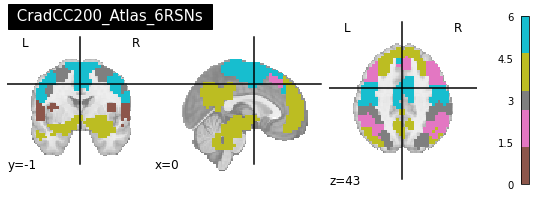

In [24]:
import numpy as np
import pandas as pd
import nibabel as nib
import nilearn.image as nlimg
from nilearn import plotting
from nilearn.image import new_img_like
import nilearn.datasets as datasets
# ==============================================================================
#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    
# =================================================
def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
#     ================================================================
def Get_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
    return no_of_labels, uniq_labels, atlas_flat
# =======================================================================
def Get_ArrayLabel(atlasFile, Label): #, RefAtlasFile):
    atlas_img=nib.load(atlasFile)
    #--------------------------------------------------------
#     Ref_img=nib.load(RefAtlasFile)
#     atlas_img = nlimg.resample_to_img(atlas_img, Ref_img, interpolation='nearest')
    # --------------------------------------------------
    atlas_data = atlas_img.get_fdata() 
    
    atlas_flat = atlas_data.flatten()
    atlas_flat = atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    no_of_labels=len(np.unique(atlas_flat))
    print('file name=',atlasFile)
    print('no_of_labels=',no_of_labels)
    print('uniqe labels =',uniq_labels)
    
    
    atlas_flat[atlas_flat != 0] = Label
    
    return atlas_flat,atlas_data,atlas_img

# =====================================================================================
def Clear_n_Keep(Arr,RemoveList, KeepValue):
    new_array=[]
    new_array = [0 for i in range(len(Arr))] 
   
    for i in range(len(Arr)):
        if Arr[i] in RemoveList:
            new_array[i]=KeepValue

    return new_array
# ===================================================
def CombineArr(Arr1,Arr2):
    new_array=[]
    new_array = [0 for i in range(len(Arr1))] 
   
    for i in range(len(Arr1)):
        if Arr1[i]==0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
        if Arr1[i]!=0 and Arr2[i]==0:
            new_array[i]=Arr1[i]
        if Arr1[i]!=0 and Arr2[i]!=0:
            new_array[i]=Arr2[i]
#             print(Arr1[i], Arr2[i])
            print('Error in Combination')
           
    return (new_array)
# ===================================================================
OrgnFile='Org_Atlases/Craddock_ROIs_748.nii'
RefAtlas='RefBrain/MNI152NLin6_res-1x1x1_T1w.nii.gz'

no_of_labels, uniq_labels, atlas_flat=Get_Img_Labels(F)
print(atlas_flat.shape)
# Display_Img_Labels(F)
# plotting_image(F, 'Corkk')

# RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'

# F1="ATLASES/RSNs/CAREN_R_AUD_1stRSN.nii.gz"  #CAREN_RSN01_AAL_Reg02.nii
# F2="ATLASES/RSNs/CAREN_R2_CCN_2ndRSN.nii.gz"
# F4="ATLASES/RSNs/CAREN_R4_DMN_4thRSN.nii.gz"
# F5="ATLASES/RSNs/CAREN_R3_SMN_5thRSN.nii.gz"
# F6="ATLASES/RSNs/CAREN_R1_VAN_6thRSN.nii.gz"

atlas_flat1,atlas_data,atlas_img= Get_ArrayLabel(OrgnFile,0)     #,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat1,[],0)

# WholeArr=np.array(WholeArr)
# print(WholeArr.shape)


replacement_value=1 # AUD
Atl1 = [replacement_value if item in AUD else 0 for item in atlas_flat]
replacement_value=2 # CCN
Atl2 = [replacement_value if item in CCN else 0 for item in atlas_flat]
replacement_value=3 # DAN
Atl3 = [replacement_value if item in DAN else 0 for item in atlas_flat]
replacement_value=4 # DMN
Atl4 = [replacement_value if item in DMN else 0 for item in atlas_flat]
replacement_value=5 # SMN
Atl5 = [replacement_value if item in SMN else 0 for item in atlas_flat]
replacement_value=6 # VAN
Atl6 = [replacement_value if item in VAN else 0 for item in atlas_flat]

# Atl1,X,Y= Get_ArrayLabel(F1,1,RefAtlas)
# Atl2,X,Y= Get_ArrayLabel(F2,2,RefAtlas)
# Atl4,X,Y= Get_ArrayLabel(F4,4,RefAtlas)
# Atl5,X,Y= Get_ArrayLabel(F5,5,RefAtlas)
# Atl6,X,Y= Get_ArrayLabel(F6,6,RefAtlas)

WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)
WholeArr=CombineArr(WholeArr,Atl3)
WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
WholeArr=CombineArr(WholeArr,Atl6)

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="T_RSNs/CradCC200_Atlas_6RSNs.nii.gz"
this_img.to_filename(SaveFile)

Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CradCC200_Atlas_6RSNs ")



In [22]:
original_list=[1,2,3,4,5,6,7,8,9,10]
list2=[2,5,9]


replacement_value=1 # AUD
new_list = [replacement_value if item in list2 else 0 for item in original_list]

print(new_list)

[0, 1, 0, 0, 1, 0, 0, 0, 1, 0]


In [35]:
# 1st RSN CC400
AUD= [106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 
      131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
print(AUD)
# 3rd RSN CC400
DAN=[388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
     412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
     436, 437, 438, 439, 440]
print(DAN)
# 5th RSN CC400
SMN=[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
     179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
     203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]
print(SMN)



[106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154]
[388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440]
[155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225]


In [36]:
#  6th RSN CC400
VAN= [497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520,
      521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 441, 442, 443, 444, 445, 446,
      447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]
print(VAN)


[497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]


In [37]:
# 2nd RSN  CC400

CCN= [574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597,
      598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
      622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 441, 442, 443, 444, 445,
      446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]
print (CCN)

[574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464]


In [38]:
# 4th RSN CC400

DMN=[641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664,
     665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688,
     689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712,
     713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736,
     737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748]

print(DMN)

[641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748]


Org_Atlases/Craddock_ROIs_748.nii
no_of_labels = 748
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230

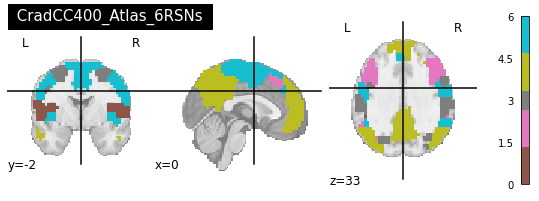

In [39]:
OrgnFile='Org_Atlases/Craddock_ROIs_748.nii'
RefAtlas='RefBrain/MNI152NLin6_res-1x1x1_T1w.nii.gz'

no_of_labels, uniq_labels, atlas_flat=Get_Img_Labels(F)
print(atlas_flat.shape)
# Display_Img_Labels(F)
# plotting_image(F, 'Corkk')

# RefAtlas='ATLASES/ReLabeled_Atlases/Relabeling_PowerAtlas_10Networks.nii.gz'

# F1="ATLASES/RSNs/CAREN_R_AUD_1stRSN.nii.gz"  #CAREN_RSN01_AAL_Reg02.nii
# F2="ATLASES/RSNs/CAREN_R2_CCN_2ndRSN.nii.gz"
# F4="ATLASES/RSNs/CAREN_R4_DMN_4thRSN.nii.gz"
# F5="ATLASES/RSNs/CAREN_R3_SMN_5thRSN.nii.gz"
# F6="ATLASES/RSNs/CAREN_R1_VAN_6thRSN.nii.gz"

atlas_flat1,atlas_data,atlas_img= Get_ArrayLabel(OrgnFile,0)     #,RefAtlas)
WholeArr=Clear_n_Keep(atlas_flat1,[],0)

# WholeArr=np.array(WholeArr)
# print(WholeArr.shape)


replacement_value=1 # AUD
Atl1 = [replacement_value if item in AUD else 0 for item in atlas_flat]
replacement_value=2 # CCN
Atl2 = [replacement_value if item in CCN else 0 for item in atlas_flat]
replacement_value=3 # DAN
Atl3 = [replacement_value if item in DAN else 0 for item in atlas_flat]
replacement_value=4 # DMN
Atl4 = [replacement_value if item in DMN else 0 for item in atlas_flat]
replacement_value=5 # SMN
Atl5 = [replacement_value if item in SMN else 0 for item in atlas_flat]
replacement_value=6 # VAN
Atl6 = [replacement_value if item in VAN else 0 for item in atlas_flat]

# Atl1,X,Y= Get_ArrayLabel(F1,1,RefAtlas)
# Atl2,X,Y= Get_ArrayLabel(F2,2,RefAtlas)
# Atl4,X,Y= Get_ArrayLabel(F4,4,RefAtlas)
# Atl5,X,Y= Get_ArrayLabel(F5,5,RefAtlas)
# Atl6,X,Y= Get_ArrayLabel(F6,6,RefAtlas)

WholeArr=CombineArr(WholeArr,Atl1)
WholeArr=CombineArr(WholeArr,Atl2)
WholeArr=CombineArr(WholeArr,Atl3)
WholeArr=CombineArr(WholeArr,Atl4)
WholeArr=CombineArr(WholeArr,Atl5)
WholeArr=CombineArr(WholeArr,Atl6)

WholeArr=np.array(WholeArr)
newAtlas=WholeArr.reshape(atlas_data.shape)
this_img =nib.Nifti1Image(newAtlas,  atlas_img.affine, header=atlas_img.header)
SaveFile="T_RSNs/CradCC400_Atlas_6RSNs.nii.gz"
this_img.to_filename(SaveFile)

Display_Img_Labels(SaveFile)
plotting_image(SaveFile," CradCC400_Atlas_6RSNs ")



In [2]:
import os

def convert_path(path):
    # Convert Windows-style path separators to Unix-style
    path = path.replace("\\", "/")
    
    # Convert Windows drive letter to Unix-style root
    if ":" in path:
        drive, path = path.split(":", 1)
        path = "/" + drive.upper() + path
    
    return path
# =============================================================
# Example usage
# windows_path = r"C:\Users\John\Documents\file.txt"
# linux_path = convert_path(windows_path)
# print(linux_path)

T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz
no_of_labels = 6
uniqe labels = [1 2 3 4 5 6]
No. of Non-Zero Voxels = 616000
Size of brain Atlas (No. of Voxels) = 7221032


C:\Users\IT-Department\anaconda3\envs\tf\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


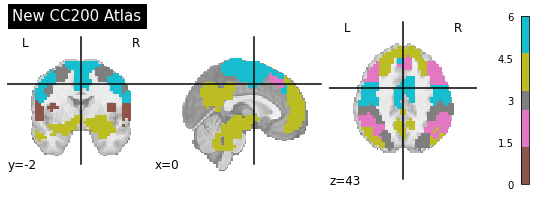

T_RSNs/CradCC200-1stRSN_atlas.nii.gz
no_of_labels = 1
uniqe labels = [1]
No. of Non-Zero Voxels = 72704
Size of brain Atlas (No. of Voxels) = 7221032


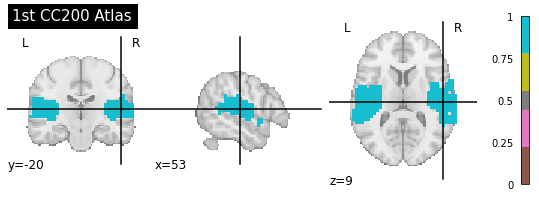

T_RSNs/CradCC200-2ndRSN_atlas.nii.gz
no_of_labels = 1
uniqe labels = [2]
No. of Non-Zero Voxels = 90752
Size of brain Atlas (No. of Voxels) = 7221032


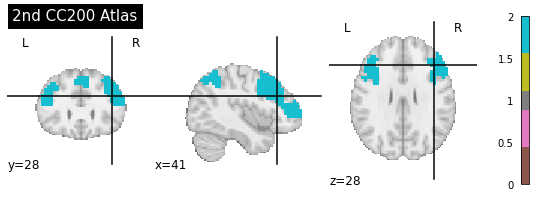

In [5]:
# --------------------------------------- CC200 ------------------------------------
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
from nilearn.image import new_img_like
#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",1, "T_RSNs/CradCC200-1stRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",2, "T_RSNs/CradCC200-2ndRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",3, "T_RSNs/CradCC200-3rdRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",4, "T_RSNs/CradCC200-4thRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",5, "T_RSNs/CradCC200-5thRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz",6, "T_RSNs/CradCC200-6thRSN_atlas.nii.gz")
# =================================================================================================
Display_Img_Labels("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz")
plotting_image("T_RSNs/K_resampled_CradCC200-6RSNs_atlas.nii.gz","New CC200 Atlas")

Display_Img_Labels("T_RSNs/CradCC200-1stRSN_atlas.nii.gz")
plotting_image("T_RSNs/CradCC200-1stRSN_atlas.nii.gz","1st CC200 Atlas")

Display_Img_Labels("T_RSNs/CradCC200-2ndRSN_atlas.nii.gz")
plotting_image("T_RSNs/CradCC200-2ndRSN_atlas.nii.gz","2nd CC200 Atlas")

# ....

T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz
no_of_labels = 6
uniqe labels = [1 2 3 4 5 6]
No. of Non-Zero Voxels = 594496
Size of brain Atlas (No. of Voxels) = 7221032


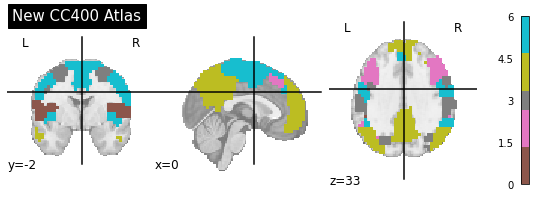

T_RSNs/CradCC400-1stRSN_atlas.nii.gz
no_of_labels = 1
uniqe labels = [1]
No. of Non-Zero Voxels = 72704
Size of brain Atlas (No. of Voxels) = 7221032


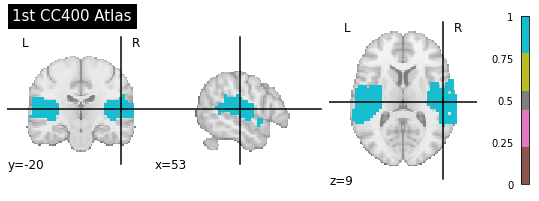

T_RSNs/CradCC400-2ndRSN_atlas.nii.gz
no_of_labels = 1
uniqe labels = [2]
No. of Non-Zero Voxels = 90752
Size of brain Atlas (No. of Voxels) = 7221032


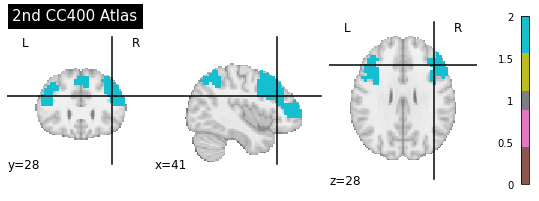

In [6]:
# --------------------------------------- CC400 ------------------------------------
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import plotting
from nilearn.image import new_img_like

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
# ========================== Save dedicated images ==========================================

def save_Single_RSN(Atlas_file, LabelNo, File2Save):
    atlas_img=nib.load(Atlas_file)
    atlas_data = atlas_img.get_fdata()
 
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    Arr=atlas_flat
    Arr[Arr != LabelNo] = 0
    
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(File2Save)


save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",1, "T_RSNs/CradCC400-1stRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",2, "T_RSNs/CradCC400-2ndRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",3, "T_RSNs/CradCC400-3rdRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",4, "T_RSNs/CradCC400-4thRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",5, "T_RSNs/CradCC400-5thRSN_atlas.nii.gz")
save_Single_RSN("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz",6, "T_RSNs/CradCC400-6thRSN_atlas.nii.gz")
# =================================================================================================
Display_Img_Labels("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz")
plotting_image("T_RSNs/K_resampled_CradCC400-6RSNs_atlas.nii.gz","New CC400 Atlas")

Display_Img_Labels("T_RSNs/CradCC400-1stRSN_atlas.nii.gz")
plotting_image("T_RSNs/CradCC400-1stRSN_atlas.nii.gz","1st CC400 Atlas")

Display_Img_Labels("T_RSNs/CradCC400-2ndRSN_atlas.nii.gz")
plotting_image("T_RSNs/CradCC400-2ndRSN_atlas.nii.gz","2nd CC400 Atlas")

# ....

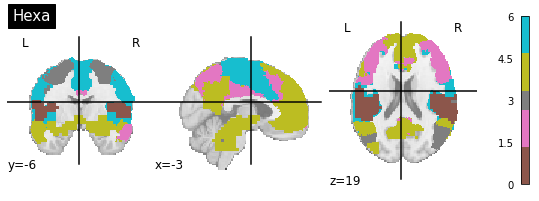

HexaNet_ATLAS.nii.gz
no_of_labels = 6
uniqe labels = [1 2 3 4 5 6]
No. of Non-Zero Voxels = 1003482
Size of brain Atlas (No. of Voxels) = 7221032


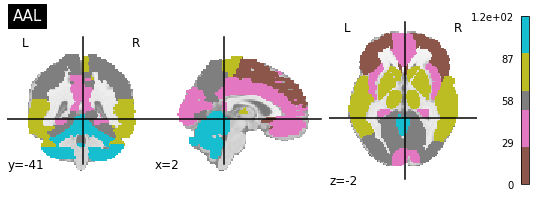

New_AAL.nii.gz
no_of_labels = 116
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116]
No. of Non-Zero Voxels = 185405
Size of brain Atlas (No. of Voxels) = 902629


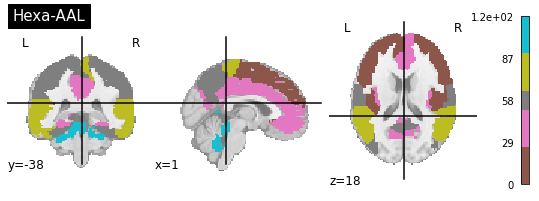

Hexa_AAL.nii.gz
no_of_labels = 110
uniqe labels = [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 103 104 105 106 109 110 111
 115 116]
No. of Non-Zero Voxels = 114055
Size of brain Atlas (No. of Voxels) = 902629


In [24]:
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting
from nilearn.image import new_img_like

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='tab10',
#     bg_img=template,
#     cut_coords=(36, -27, 66),
#     threshold=3,
    title=Title
    )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]

    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
def Re_Labeling_AAL(atlasFile,NewAtlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
    uniq_labels=np.unique(atlas_flat)
    index = 0
    if uniq_labels[index]==0:
        uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    CL=1
    for L in uniq_labels:
        atlas_flat[atlas_flat == L]= CL
        CL=CL+1
    
    Arr=atlas_flat
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(NewAtlasFile)
    
def InterSec_2atlases(atlasFile1,atlasFile2, IntersecFile):
    atlas_img1=nib.load(atlasFile1)
    atlas_data1 = atlas_img1.get_fdata()
    
    atlas_flat1 = atlas_data1.flatten()
    atlas_flat1=atlas_flat1.astype(int)
    
    atlas_img2=nib.load(atlasFile2)
    atlas_img2 = nimg.resample_to_img(atlas_img2, atlas_img1, interpolation = 'nearest')
    atlas_data2 = atlas_img2.get_fdata()
    
    atlas_flat2 = atlas_data2.flatten()
    atlas_flat2=atlas_flat2.astype(int)
    
    
    
    A1= np.array(atlas_flat1) 
    A2= np.array(atlas_flat2)
    A3 = [x if y != 0 else 0 for x, y in zip(A1, A2)]
    
    Arr=np.array(A3)
    NoArray=Arr.reshape(atlas_data1.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img1.affine, header=atlas_img1.header)
    img.to_filename(IntersecFile)
    
HexAtlas='HexaNet_ATLAS.nii.gz'
AALatlas='AAL.nii.gz'
NewAALatlas='New_AAL.nii.gz'

plotting_image(HexAtlas,'Hexa')
Display_Img_Labels(HexAtlas)

Re_Labeling_AAL(AALatlas, NewAALatlas)
plotting_image(NewAALatlas,'AAL')
Display_Img_Labels(NewAALatlas)

InterSeFile='Hexa_AAL.nii.gz'
InterSec_2atlases(NewAALatlas, HexAtlas,  InterSeFile)

plotting_image(InterSeFile,'Hexa-AAL')
Display_Img_Labels(InterSeFile)

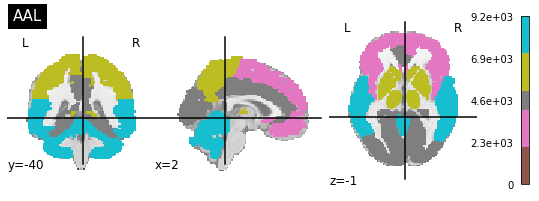

AAL.nii.gz
no_of_labels = 116
uniqe labels = [2001 2002 2101 2102 2111 2112 2201 2202 2211 2212 2301 2302 2311 2312
 2321 2322 2331 2332 2401 2402 2501 2502 2601 2602 2611 2612 2701 2702
 3001 3002 4001 4002 4011 4012 4021 4022 4101 4102 4111 4112 4201 4202
 5001 5002 5011 5012 5021 5022 5101 5102 5201 5202 5301 5302 5401 5402
 6001 6002 6101 6102 6201 6202 6211 6212 6221 6222 6301 6302 6401 6402
 7001 7002 7011 7012 7021 7022 7101 7102 8101 8102 8111 8112 8121 8122
 8201 8202 8211 8212 8301 8302 9001 9002 9011 9012 9021 9022 9031 9032
 9041 9042 9051 9052 9061 9062 9071 9072 9081 9082 9100 9110 9120 9130
 9140 9150 9160 9170]
No. of Non-Zero Voxels = 185405
Size of brain Atlas (No. of Voxels) = 902629


In [27]:
F='AAL.nii.gz'
plotting_image(F,'AAL')
Display_Img_Labels(F)

In [45]:
A1=[1, 4, 8, 23, 5]
A2=[0, 1, 0,  1, 2]

A1= np.array(A1) 
A2= np.array(A2)
# indicies= A2 > 0
# A3= A1[indicies]

# A3 = [x for x, y in zip(A1, A2) if y != 0]
# A3 = [x if y != 0 else 0 for x, y in zip(A1, A2)]

def find_RoI_of_Cert_Label(x, Arr1, Arr2):
    indicies= np.where(x == Arr1)
#     print('index    ', indicies)
    List= Arr2[indicies]
    return List

Atlas1= 'Hexa_AAL.nii.gz'
Atlas2= 'HexaNet_ATLAS.nii.gz'
# ------------------------------------------------------------
atlas_img1=nib.load(Atlas1)
atlas_data1 = atlas_img1.get_fdata()
atlas_flat1 = atlas_data1.flatten()
atlas_flat1=atlas_flat1.astype(int)
# -----------------------------------------------------------
atlas_img2=nib.load(Atlas2)
atlas_img2 = nimg.resample_to_img(atlas_img2, atlas_img1, interpolation = 'nearest')
atlas_data2 = atlas_img2.get_fdata()
atlas_flat2 = atlas_data2.flatten()
atlas_flat2=atlas_flat2.astype(int)
# ------------------------------------------------------------
print(f" Atlas1 size ={atlas_flat1.shape} \n Atlas2 size ={atlas_flat2.shape}")

ArrCount= np.zeros((6+1,116+1))
for x in np.unique(atlas_flat2):
    L= find_RoI_of_Cert_Label(x, atlas_flat2, atlas_flat1)
#     indicies= np.where(x == A2)
#     print('index    ', indicies)
#     L= A1[indicies]
    print(f" {x} corresponding to {np.unique(L)} values ")
    for y in np.unique(L):
        print(f" occurence of {y} in {x} equal to {np.count_nonzero(L == y)}\n")
        ArrCount[x,y]= np.count_nonzero(L == y)
    

# A3

 Atlas1 size =(902629,) 
 Atlas2 size =(902629,)
 0 corresponding to [0] values 
 occurence of 0 in 0 equal to 776528

 1 corresponding to [ 0  1  2 11 17 18 29 30 57 58 63 64 73 74 79 80 81 82 83 84 85 86] values 
 occurence of 0 in 1 equal to 592

 occurence of 1 in 1 equal to 1

 occurence of 2 in 1 equal to 11

 occurence of 11 in 1 equal to 27

 occurence of 17 in 1 equal to 673

 occurence of 18 in 1 equal to 869

 occurence of 29 in 1 equal to 346

 occurence of 30 in 1 equal to 424

 occurence of 57 in 1 equal to 337

 occurence of 58 in 1 equal to 87

 occurence of 63 in 1 equal to 342

 occurence of 64 in 1 equal to 274

 occurence of 73 in 1 equal to 4

 occurence of 74 in 1 equal to 20

 occurence of 79 in 1 equal to 224

 occurence of 80 in 1 equal to 239

 occurence of 81 in 1 equal to 1729

 occurence of 82 in 1 equal to 2097

 occurence of 83 in 1 equal to 14

 occurence of 84 in 1 equal to 134

 occurence of 85 in 1 equal to 591

 occurence of 86 in 1 equal to 333

 2 

In [53]:
# ArrCount= np.zeros((3 +1,10+1))
print(ArrCount.shape)
ArrCount=ArrCount.astype(int)
print(ArrCount)

for i in range(1,6+1):
    print(f"\nrow no. {i}")
    for j in range(1, 116+1):
#         ArrCount[i,j]=i+j
        print(f"{int(ArrCount[i,j])} ", end='')


(7, 117)
[[776528      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0]
 [   592      1     11      0      0      0      0      0      0      0
       0     27      0      0      0      0      0    673    869      0
   

In [55]:
def find_max_columns(arr):
    num_columns = len(arr[0])  # Number of columns in the array
    max_values = []  # List to store the maximum values of each column
    Loc_max_values = []
    
    for col in range(num_columns):
        max_val = arr[0][col]  # Assume first element of the column is the maximum
        mxrw=0
        
        # Iterate over the rows to find the maximum value in the column
        for row in range(1, len(arr)):
            if arr[row][col] > max_val:
                max_val = arr[row][col]  # Update the maximum value
                mxrw=row
        
        max_values.append(max_val)  # Add the maximum value of the column to the list
        Loc_max_values.append(mxrw)
    
    return max_values,Loc_max_values

# Example usage
array_2d = [
    [10, 20, 130],
    [40, 100, 60],
    [70, 80, 90]
]

max_columns,locations = find_max_columns(ArrCount) #array_2d)
print(max_columns)  # Output: [70, 80, 90]
print(locations)

[776528, 1282, 1792, 1515, 1201, 319, 325, 2334, 3586, 570, 749, 562, 947, 1320, 1133, 1011, 704, 673, 869, 842, 1240, 82, 80, 2072, 1619, 552, 672, 221, 182, 866, 681, 929, 800, 574, 602, 265, 140, 496, 638, 507, 659, 190, 242, 437, 166, 292, 202, 137, 82, 183, 327, 858, 610, 404, 276, 607, 711, 2414, 1879, 1423, 1398, 1563, 1273, 412, 692, 814, 872, 1263, 954, 1074, 652, 8, 4, 52, 187, 6, 112, 15, 16, 224, 239, 1729, 2097, 655, 523, 2517, 1337, 246, 314, 698, 1088, 124, 77, 190, 4, 124, 145, 395, 299, 25, 59, 10, 0, 3, 37, 141, 231, 0, 0, 53, 141, 71, 0, 0, 0, 119, 84]
[0, 5, 5, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 1, 1, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 4, 4, 5, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 5, 5, 3, 3, 2, 2, 3, 3, 4, 2, 4, 4, 5, 5, 4, 4, 6, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 3, 4, 4, 4, 3, 2, 4, 6, 4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 4, 4, 4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 4]


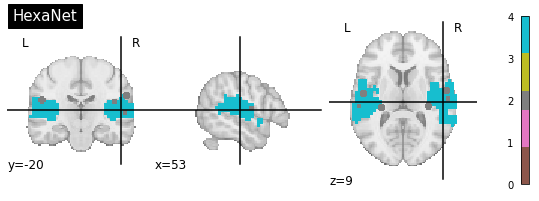

1stRSN_AUN_5_ATLASES.nii.gz
no_of_labels = 3
uniqe labels = [0 2 4]
No. of Non-Zero Voxels = 74901
Size of brain Atlas (No. of Voxels) = 7221032


In [64]:
F= '1stRSN_AUN_5_ATLASES.nii.gz'#'New_AAL.nii.gz' #'AAL.nii.gz' #'Hexa_AAL.nii.gz'
plotting_image(F,'HexaNet')
Display_Img_Labels(F)

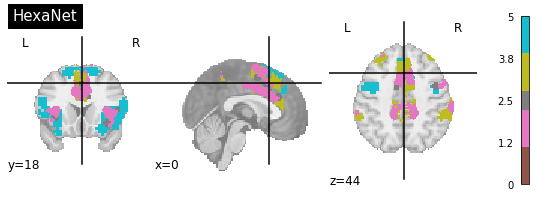

6thRSN_VAN_5_ATLASES.nii.gz
no_of_labels = 6
uniqe labels = [0 1 2 3 4 5]
No. of Non-Zero Voxels = 226993
Size of brain Atlas (No. of Voxels) = 7221032


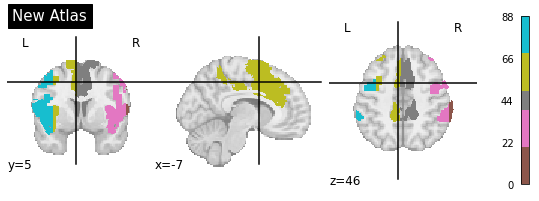

6thRSN_100_VAN_5_ATLASES.nii.gz
no_of_labels = 78
uniqe labels = [ 0 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82
 83 84 85 86 87 88]
No. of Non-Zero Voxels = 226993
Size of brain Atlas (No. of Voxels) = 7221032


In [85]:
def split_Network_to_100_parts(atlasFile,NewAtlasFile):
    # ReLabeling
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)
    
#     uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
#     no_of_labels=len(uniq_labels)
    sz=len(atlas_flat)
    N=int(sz/100)
    
    CL=0
    for i in range(0, sz, N):
        CL=CL+1
#         if i>= len(atlas_flat):
#                 break
        if i+N > sz:
            break
        for j in range(i, i+N):
            if atlas_flat[j]!= 0:
                atlas_flat[j]=CL
        
    Arr=atlas_flat
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(NewAtlasFile)
    
F= '6thRSN_VAN_5_ATLASES.nii.gz'
# '5thRSN_SMN_5_ATLASES.nii.gz'
# '4thRSN_DMN_5_ATLASES.nii.gz'
# '3rdRSN_DAN_5_ATLASES.nii.gz'
# '2ndRSN_CCN_5_ATLASES.nii.gz'
# '1stRSN_AUN_5_ATLASES.nii.gz'
#'New_AAL.nii.gz' #'AAL.nii.gz' #'Hexa_AAL.nii.gz'
plotting_image(F,'HexaNet')
Display_Img_Labels(F)

NF='6thRSN_100_VAN_5_ATLASES.nii.gz'
# '3rdRSN_100_DAN_5_ATLASES.nii.gz'
split_Network_to_100_parts(F, NF)

plotting_image(NF,'New Atlas')
Display_Img_Labels(NF)

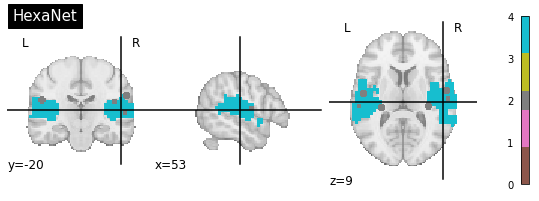

1stRSN_AUN_5_ATLASES.nii.gz
no_of_labels = 3
uniqe labels = [0 2 4]
No. of Non-Zero Voxels = 74901
Size of brain Atlas (No. of Voxels) = 7221032


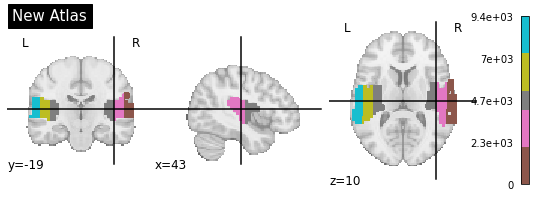

1stRSN_10K_AUN_5_ATLASES.nii.gz
no_of_labels = 9364
uniqe labels = [   0    1    2 ... 9361 9362 9363]
No. of Non-Zero Voxels = 74901
Size of brain Atlas (No. of Voxels) = 7221032


In [106]:
def split_RSN_to_10K_parts(atlasFile,NewAtlasFile,KStep=10000):
    # ReLabeling
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
    atlas_flat=atlas_flat.astype(int)

    count = np.count_nonzero(atlas_flat)
    N=int(count/KStep) +1
    
    CL=0
    indices = np.nonzero(atlas_flat)[0]
    for count, index in enumerate(indices):
        atlas_flat[index]= int(count/N)+1
        
    Arr=atlas_flat
    NoArray=Arr.reshape(atlas_data.shape)
    img =nib.Nifti1Image(NoArray,  atlas_img.affine, header=atlas_img.header)
    img.to_filename(NewAtlasFile)
    
F= '1stRSN_AUN_5_ATLASES.nii.gz'
# '6thRSN_VAN_5_ATLASES.nii.gz'
# '5thRSN_SMN_5_ATLASES.nii.gz'
# '4thRSN_DMN_5_ATLASES.nii.gz'
# '3rdRSN_DAN_5_ATLASES.nii.gz'
# '2ndRSN_CCN_5_ATLASES.nii.gz'
# '1stRSN_AUN_5_ATLASES.nii.gz'
#'New_AAL.nii.gz' #'AAL.nii.gz' #'Hexa_AAL.nii.gz'
plotting_image(F,'HexaNet')
Display_Img_Labels(F)

NF='1stRSN_10K_AUN_5_ATLASES.nii.gz'
# '6thRSN_10K_VAN_5_ATLASES.nii.gz'
# '3rdRSN_100_DAN_5_ATLASES.nii.gz'
split_RSN_to_10K_parts(F, NF)

plotting_image(NF,'New Atlas')
Display_Img_Labels(NF)

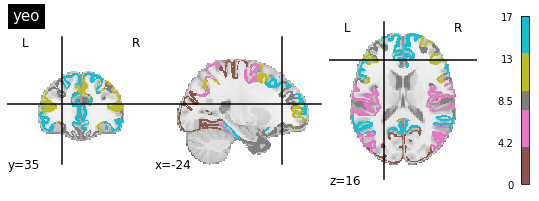

Yeo2011_17Networks_MNI152_FreeSurferConformed1mm.nii.gz
no_of_labels = 18
uniqe labels = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
No. of Non-Zero Voxels = 527685
Size of brain Atlas (No. of Voxels) = 16777216


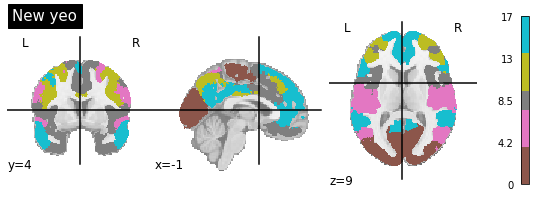

Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz
no_of_labels = 18
uniqe labels = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
No. of Non-Zero Voxels = 1054733
Size of brain Atlas (No. of Voxels) = 16777216


In [110]:
F= 'Yeo2011_17Networks_MNI152_FreeSurferConformed1mm.nii.gz'
FN='Yeo2011_17Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
plotting_image(F,'yeo')
Display_Img_Labels(F)

plotting_image(FN,'New yeo')
Display_Img_Labels(FN)

In [92]:
L=[1,3,0,5,0,4]
# count = np.count_nonzero(L)
# print(count)
indices = np.nonzero(L)[0]
print(indices)

[0 1 3 5]


In [109]:
import numpy as np
from scipy.stats import pearsonr

# Assuming you have the voxel data for RSN1 and RSN2 stored in numpy arrays
rsn1_voxels = np.array([1, 2, 3, 4, 5])  # Replace with your actual data
rsn2_voxels = np.array([ 8, 7, 6, 10, 9])  # Replace with your actual data

# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(rsn1_voxels, rsn2_voxels)

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)


Pearson correlation coefficient: 0.5
p-value: 0.39100221895577075


In [99]:
def split_RSN_to_10K_parts(atlas_flat, KStep):
    # ReLabeling
#     atlas_img=nib.load(atlasFile)
#     atlas_data = atlas_img.get_fdata()
    
#     atlas_flat = atlas_data.flatten()
#     atlas_flat=atlas_flat.astype(int)
    
#     uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
#     no_of_labels=len(uniq_labels)
    
#     KStep=10000
    count = np.count_nonzero(atlas_flat)
    N=int(count/KStep) +1
    
    CL=0
    indices = np.nonzero(atlas_flat)[0]
    for count, index in enumerate(indices):
        atlas_flat[index]= int(count/N)+1
        
    Arr=atlas_flat
    print(Arr)
    
L=[1,1,1,0,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,1,6,7]
print(len(L))
split_RSN_to_10K_parts(L,5)

27
[1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 4, 4, 4, 0, 4, 4, 5, 5]


In [78]:
sz=543
A=np.zeros(sz)
A= np.random.randint(0,10,sz)

N=int(sz/100)
CL=0

for i in range(0, sz, N):
    CL=CL+1
    if i+N > sz:
        break
    print(f"now range from {i} to {i+N}")
    for j in range(i, i+N):
        if A[j]!= 0:
            A[j]=CL
print(A)

now range from 0 to 5
now range from 5 to 10
now range from 10 to 15
now range from 15 to 20
now range from 20 to 25
now range from 25 to 30
now range from 30 to 35
now range from 35 to 40
now range from 40 to 45
now range from 45 to 50
now range from 50 to 55
now range from 55 to 60
now range from 60 to 65
now range from 65 to 70
now range from 70 to 75
now range from 75 to 80
now range from 80 to 85
now range from 85 to 90
now range from 90 to 95
now range from 95 to 100
now range from 100 to 105
now range from 105 to 110
now range from 110 to 115
now range from 115 to 120
now range from 120 to 125
now range from 125 to 130
now range from 130 to 135
now range from 135 to 140
now range from 140 to 145
now range from 145 to 150
now range from 150 to 155
now range from 155 to 160
now range from 160 to 165
now range from 165 to 170
now range from 170 to 175
now range from 175 to 180
now range from 180 to 185
now range from 185 to 190
now range from 190 to 195
now range from 195 to 200
no

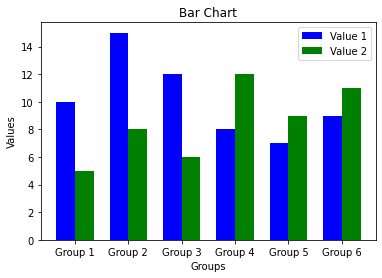

In [84]:
import matplotlib.pyplot as plt

# Define the data
groups = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5', 'Group 6']
value1 = [10, 15, 12, 8, 7, 9]  # Values for the first set
value2 = [5, 8, 6, 12, 9, 11]   # Values for the second set

# Set up the figure and axis
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the x-axis ticks
x_pos = range(len(groups))

# Create the bar chart for value1
ax.bar(x_pos, value1, width=bar_width, color='b', label='Value 1')

# Create the bar chart for value2, shifted by the bar width
ax.bar([x + bar_width for x in x_pos], value2, width=bar_width, color='g', label='Value 2')

# Set the labels and title
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Bar Chart')

# Set the x-axis tick labels
ax.set_xticks([x + bar_width / 2 for x in x_pos])
ax.set_xticklabels(groups)

# Add a legend
ax.legend()

# Display the chart
plt.show()
